<a href="https://colab.research.google.com/github/ashamril/FYP-RUS_GWO_PSO_Machine_Learning/blob/master/0b_SGCC_Preliminary_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Cleaned data
from datetime import datetime 
import pandas as pd
start_time = datetime.now() 
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values-v4.csv"
#file_path = "https://raw.githubusercontent.com/ashamril/CSV/master/sgcc-no-missing-values_df_months.csv"  
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean.csv"
file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_with_zero.csv"
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_90percent_zero.csv"
dataset_ori = pd.read_csv(file_path)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Time elapsed (hh:mm:ss.ms) 0:00:06.464239


In [0]:
dataset_ori

,Unnamed: 0,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,...,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31,CONS_NO
0,0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74,0387DD8A07E07FDA6271170F86AD9151
1,1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,...,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72,EDFC78B07BA2908B3395C4EB2304665E
2,2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,...,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40,34C1954AA3703C4F8BD8EAEA7C4B7B83
3,3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,...,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91,768309B0EB11FD436CEE5ABFB84F4C0C
4,4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,...,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36,516954F5FF177CE314656D727FCC66A5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50,8C32EE3B1C2B5EAFC0DCCCD4700BD5FF
23845,23846,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [0]:
# Drop Unnamed and CONS_NO columns
df = dataset_ori.iloc[:,1:-1]
df

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,6.73,...,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,3.02,...,2.16,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,1.02,...,3.19,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,5.57,...,62.96,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.34,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50
23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,152.39,158.13,229.34,226.53,188.67,251.22,223.88,184.34,205.44,290.41,268.83,291.32

In [0]:
#df_features = df.iloc[:,2:]
df_features = df.drop('FLAG', axis = 1) 
df_features.describe()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,2014-02-09,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.00000,...,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000
mean,7.537452,7.384939,7.086362,7.620985,7.795047,7.328884,7.413598,7.239690,7.331090,7.358251,7.130963,7.368013,11.115838,7.512061,7.628212,7.479650,7.199473,7.373201,7.267213,7.140828,7.466565,7.650871,7.558234,7.386885,28.802301,7.291212,7.179578,6.921765,6.930101,7.322213,6.231035,6.375996,6.148244,6.334171,6.522228,6.806401,6.922140,6.970550,7.206503,7.52963,...,9.015050,9.260534,9.546390,9.784828,9.855446,10.106856,8.874279,9.400254,9.951977,9.882395,9.852905,10.222913,10.324923,10.028181,9.691499,9.881434,9.570177,8.365817,8.084265,8.101353,8.107954,8.303587,8.165208,8.616388,8.915173,8.991182,8.710869,8.709293,9.043101,9.283243,9.517913,9.778186,8.487921,9.047057,9.330533,9.752680,9.816120,8.895038,8.409722,8.240932
std,35.599859,30.474606,31.670574,51.054025,43.223771,38.513264,47.856460,35.590464,40.683677,40.965633,39.153499,32.449025,600.746432,35.408578,37.372495,37.823015,30.714842,34.649265,35.256948,32.526866,30.518068,36.790897,28.463078,25.916489,3334.789503,27.373865,26.528116,19.513229,17.646644,15.804878,15.970557,17.218624,15.994723,17.043977,17.804059,21.213680,21.639965,22.447306,23.844748,25.83916,...,45.868727,49.350763,46.235474,47.604250,47.372585,39.890560,35.484881,43.571804,47.917516,43.007337,37.667322,44.371047,41.754194,40.588751,48.256011,46.682148,46.043011,45.708220,44.552634,41.361047,41.296593,47.424177,46.386216,49.200924,46.658128,49.206336,40.355110,41.002330,44.925515,48.533173,46.104406,48.551696,42.970460,48.628809,44.862895,44.304871,38.841218,44.206614,47.775446,43.684426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


No Frauds 89.93 % of the dataset: 21447
Frauds 10.07 % of the dataset: 2402


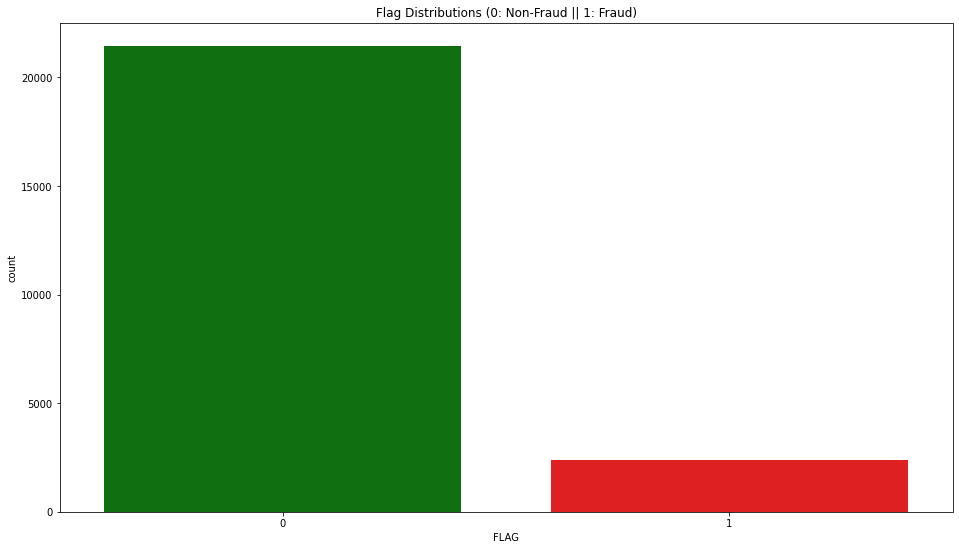

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(16,9))
colors = ["green", "red"]
sns.countplot('FLAG', data=df, palette=colors)
plt.title('Flag Distributions (0: Non-Fraud || 1: Fraud)')

# The classes are heavily imbalanced 
print('No Frauds', round(df['FLAG'].value_counts()[0]/len(df) * 100,2), '% of the dataset:', df['FLAG'].value_counts()[0])
print('Frauds', round(df['FLAG'].value_counts()[1]/len(df) * 100,2), '% of the dataset:', df['FLAG'].value_counts()[1])

In [0]:
# import plotly.graph_objs as go
# import plotly.offline as py

# #fraud = df[(df['FLAG'] != 0)]
# #non_fraud = df[(df['FLAG'] == 0)]

# trace = go.Pie(labels = ['Non-Fraud', 'Fraud'], values = df['FLAG'].value_counts(), 
#                textfont=dict(size=15), opacity = 0.8,
#                marker=dict(colors=['green','red'], 
#                            line=dict(color='#000000', width=1.5)))


# layout = dict(title =  'Distribution of target variable')
           
# fig = dict(data = [trace], layout=layout)
# py.iplot(fig)

In [0]:
for i in range(1, 10):
  print("df['2014-0", i, sep='', end = '')
  print("'] = df.filter(regex='2014-0", i, sep='', end = '')
  print("', axis=1).sum(axis=1)")
for i in range(10, 13):
  print("df['2014-", i, sep='', end = '')
  print("'] = df.filter(regex='2014-", i, sep='', end = '')
  print("', axis=1).sum(axis=1)")
for i in range(1, 10):
  print("df['2015-0", i, sep='', end = '')
  print("'] = df.filter(regex='2015-0", i, sep='', end = '')
  print("', axis=1).sum(axis=1)")
for i in range(10, 13):
  print("df['2015-", i, sep='', end = '')
  print("'] = df.filter(regex='2015-", i, sep='', end = '')
  print("', axis=1).sum(axis=1)") 
for i in range(1, 10):
  print("df['2016-0", i, sep='', end = '')
  print("'] = df.filter(regex='2016-0", i, sep='', end = '')
  print("', axis=1).sum(axis=1)")
for i in range(10, 11):
  print("df['2016-", i, sep='', end = '')
  print("'] = df.filter(regex='2016-", i, sep='', end = '')
  print("', axis=1).sum(axis=1)") 

df['2014-01'] = df.filter(regex='2014-01', axis=1).sum(axis=1)
df['2014-02'] = df.filter(regex='2014-02', axis=1).sum(axis=1)
df['2014-03'] = df.filter(regex='2014-03', axis=1).sum(axis=1)
df['2014-04'] = df.filter(regex='2014-04', axis=1).sum(axis=1)
df['2014-05'] = df.filter(regex='2014-05', axis=1).sum(axis=1)
df['2014-06'] = df.filter(regex='2014-06', axis=1).sum(axis=1)
df['2014-07'] = df.filter(regex='2014-07', axis=1).sum(axis=1)
df['2014-08'] = df.filter(regex='2014-08', axis=1).sum(axis=1)
df['2014-09'] = df.filter(regex='2014-09', axis=1).sum(axis=1)
df['2014-10'] = df.filter(regex='2014-10', axis=1).sum(axis=1)
df['2014-11'] = df.filter(regex='2014-11', axis=1).sum(axis=1)
df['2014-12'] = df.filter(regex='2014-12', axis=1).sum(axis=1)
df['2015-01'] = df.filter(regex='2015-01', axis=1).sum(axis=1)
df['2015-02'] = df.filter(regex='2015-02', axis=1).sum(axis=1)
df['2015-03'] = df.filter(regex='2015-03', axis=1).sum(axis=1)
df['2015-04'] = df.filter(regex='2015-04', axis=1).sum(

In [0]:
# Create new features - consumption sum by monthly
df['2014-01'] = df.filter(regex='2014-01', axis=1).sum(axis=1)
df['2014-02'] = df.filter(regex='2014-02', axis=1).sum(axis=1)
df['2014-03'] = df.filter(regex='2014-03', axis=1).sum(axis=1)
df['2014-04'] = df.filter(regex='2014-04', axis=1).sum(axis=1)
df['2014-05'] = df.filter(regex='2014-05', axis=1).sum(axis=1)
df['2014-06'] = df.filter(regex='2014-06', axis=1).sum(axis=1)
df['2014-07'] = df.filter(regex='2014-07', axis=1).sum(axis=1)
df['2014-08'] = df.filter(regex='2014-08', axis=1).sum(axis=1)
df['2014-09'] = df.filter(regex='2014-09', axis=1).sum(axis=1)
df['2014-10'] = df.filter(regex='2014-10', axis=1).sum(axis=1)
df['2014-11'] = df.filter(regex='2014-11', axis=1).sum(axis=1)
df['2014-12'] = df.filter(regex='2014-12', axis=1).sum(axis=1)
df['2015-01'] = df.filter(regex='2015-01', axis=1).sum(axis=1)
df['2015-02'] = df.filter(regex='2015-02', axis=1).sum(axis=1)
df['2015-03'] = df.filter(regex='2015-03', axis=1).sum(axis=1)
df['2015-04'] = df.filter(regex='2015-04', axis=1).sum(axis=1)
df['2015-05'] = df.filter(regex='2015-05', axis=1).sum(axis=1)
df['2015-06'] = df.filter(regex='2015-06', axis=1).sum(axis=1)
df['2015-07'] = df.filter(regex='2015-07', axis=1).sum(axis=1)
df['2015-08'] = df.filter(regex='2015-08', axis=1).sum(axis=1)
df['2015-09'] = df.filter(regex='2015-09', axis=1).sum(axis=1)
df['2015-10'] = df.filter(regex='2015-10', axis=1).sum(axis=1)
df['2015-11'] = df.filter(regex='2015-11', axis=1).sum(axis=1)
df['2015-12'] = df.filter(regex='2015-12', axis=1).sum(axis=1)
df['2016-01'] = df.filter(regex='2016-01', axis=1).sum(axis=1)
df['2016-02'] = df.filter(regex='2016-02', axis=1).sum(axis=1)
df['2016-03'] = df.filter(regex='2016-03', axis=1).sum(axis=1)
df['2016-04'] = df.filter(regex='2016-04', axis=1).sum(axis=1)
df['2016-05'] = df.filter(regex='2016-05', axis=1).sum(axis=1)
df['2016-06'] = df.filter(regex='2016-06', axis=1).sum(axis=1)
df['2016-07'] = df.filter(regex='2016-07', axis=1).sum(axis=1)
df['2016-08'] = df.filter(regex='2016-08', axis=1).sum(axis=1)
df['2016-09'] = df.filter(regex='2016-09', axis=1).sum(axis=1)
df['2016-10'] = df.filter(regex='2016-10', axis=1).sum(axis=1)

In [0]:
# Count total consumption yearly
df["Total_2014"] = df.filter(regex='2014-', axis=1).sum(axis=1)
df["Total_2015"] = df.filter(regex='2015-', axis=1).sum(axis=1)
df["Total_2016"] = df.filter(regex='2016-', axis=1).sum(axis=1)

In [0]:
# Count total consumption
df["Total_Consumption"] = df_features.sum(axis=1)

In [0]:
df

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-10-30,2016-10-31,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption
0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,9.16,6.74,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39,9807.98,6716.00,7916.10,12220.04
1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,6.73,...,9.86,8.72,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15,4977.08,3878.64,8198.50,8527.11
2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,3.02,...,1.26,1.40,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93,871.06,1341.78,936.36,1574.60
3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,1.02,...,3.67,2.91,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43,852.26,1960.04,2813.24,2812.77
4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,5.57,...,44.04,43.36,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15,30002.58,51267.22,46148.76,63709.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.35,1.50,0.08,0.03,0.06,0.07,0.04,0.35,0.00,0.03,0.01,0.02,0.01,0.01,1.03,8.14,1.40,81.97,50.34,59.66,39.80,28.67,57.96,91.12,110.98,154.18,123.01,74.00,70.03,64.84,23.94,0.01,35.49,38.33,38.34,39.10,1.42,1370.50,1014.18,1193.05
23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [0]:
# Take only the months features
df_months_flag = df.iloc[:,-38:]
df_months_flag['FLAG'] = df['FLAG']
df_months_flag

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39,9807.98,6716.00,7916.10,12220.04,1
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15,4977.08,3878.64,8198.50,8527.11,1
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93,871.06,1341.78,936.36,1574.60,1
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43,852.26,1960.04,2813.24,2812.77,1
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15,30002.58,51267.22,46148.76,63709.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0.08,0.03,0.06,0.07,0.04,0.35,0.00,0.03,0.01,0.02,0.01,0.01,1.03,8.14,1.40,81.97,50.34,59.66,39.80,28.67,57.96,91.12,110.98,154.18,123.01,74.00,70.03,64.84,23.94,0.01,35.49,38.33,38.34,39.10,1.42,1370.50,1014.18,1193.05,0
23845,0.00,1195.38,4117.42,3984.60,3867.40,4210.82,4916.98,3954.23,3599.20,2535.49,2388.86,2530.23,2365.60,1373.71,2202.43,2471.46,3180.61,3852.82,3933.40,3882.46,3123.51,2969.28,2565.86,2301.39,2545.16,1846.27,2279.19,2230.38,3013.14,3791.73,10479.74,7353.82,5403.92,5551.93,74601.22,68445.06,88990.56,116018.42,0
23846,65.26,77.31,54.06,57.53,56.34,32.61,10.88,5.43,6.80,5.70,3.29,298.11,688.82,339.79,496.14,98.69,154.87,77.88,178.94,171.10,121.43,94.73,60.32,75.60,68.25,229.74,167.56,270.08,215.08,172.67,211.66,218.06,179.35,191.98,1346.64,5116.62,3848.86,5156.06,0
23847,0.00,41.67,135.88,113.09,128.18,198.26,391.73,363.76,356.36,112.07,105.32,124.11,131.88,128.36,123.99,114.72,121.73,249.83,284.06,148.18,143.40,148.18,143.40,148.18,142.68,159.18,144.42,113.31,165.51,280.41,315.84,286.20,218.51,181.61,4140.86,3771.82,4015.34,5964.01,0


In [0]:
df_months_flag.describe()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
count,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.00000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.00000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,2.384900e+04,2.384900e+04,2.384900e+04,2.384900e+04,23849.000000
mean,252.052510,214.632360,289.030964,270.768315,294.151022,304.883909,418.206440,353.190505,325.219622,233.256008,232.496000,264.711837,274.934775,239.159104,260.18818,242.730534,258.969406,318.702971,336.234211,329.438744,268.232003,256.567402,247.158420,272.340289,299.71151,279.006146,284.162797,256.006183,282.003336,354.239452,418.994229,404.465751,291.940324,282.127961,6.905199e+03,6.609312e+03,6.305315e+03,9.909913e+03,0.100717
std,3506.099634,664.571663,1300.454600,1548.112893,6341.079363,4419.226580,5666.591469,1364.747498,1406.261977,1307.799917,1253.018886,1361.369485,1195.277259,656.527805,984.04952,983.024500,1015.491358,1069.729332,1160.570713,1169.160558,1015.628037,972.300091,916.534485,988.580880,1095.50591,877.543331,1180.002874,1171.214439,1304.622432,1435.379795,1469.114708,1487.540210,1223.932721,1306.438332,3.498798e+04,2.255165e+04,2.375096e+04,3.688109e+04,0.300960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000
25%,26.710000,35.870000,41.180000,38.590000,39.990000,44.620000,50.840000,51.630000,50.090000,42.600000,41.400000,45.710000,48.460000,51.310000,50.80000,46.450000,47.730000,51.900000,52.920000,52.470000,46.700000,46.300000,42.860000,46.330000,54.85000,58.860000,50.500000,47.920000,50.890000,56.980000,61.750000,61.030000,50.110000,50.550000,1.425280e+03,1.518560e+03,1.425520e+03,2.603190e+03,0.000000
50%,128.340000,126.170000,146.770000,132.050000,138.450000,149.820000,188.120000,186.500000,169.820000,131.830000,133.520000,154.570000,160.900000,159.450000,160.08000,143.890000,150.730000,176.890000,184.270000,179.350000,151.360000,147.560000,143.020000,160.400000,181.14000,187.060000,171.180000,152.610000,159.010000,188.580000,220.320000,211.900000,159.020000,158.750000,3.925840e+03,4.054780e+03,3.828600e+03,6.073210e+03,0.000000
75%,266.870000,252.570000,283.940000,246.590000,254.400000,284.200000,418.480000,401.580000,352.270000,234.860000,241.130000,288.710000,303.910000,288.170000,295.05000,258.360000,271.870000,349.510000,368.790000,357.430000,280.800000,266.650000,262.190000,302.230000,340.14000,338.910000,315.820000,271.700000,284.530000,371.050000,464.210000,438.430000,297.420000,281.640000,7.127880e+03,7.159720e+03,6.719720e+03,1.045415e+04,0.000000
max,515000.160000,39125.000000,105948.000000,113283.530000,955189.600000,653581.590000,640000.000000,143688.000000,150960.000000,144180.000000,136398.000000,152928.000000,116022.000000,49268.550000,56585.60000,56332.400000,63485.200000,74148.800000,85180.000000,87185.600000,70481.200000,67376.000000,63126.000000,77603.600000,86416.80000,78906.800000,99730.000000,101175.000000,112733.000000,107811.000000,103694.400000,102599.000000,100346.000000,104707.000000,2.868372e+06,1.492666e+06,1.761916e+06,2.765812e+06,1.000000


In [0]:
# Take only the months features
df_months = df.iloc[:,-38:-4]
df_months

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0.08,0.03,0.06,0.07,0.04,0.35,0.00,0.03,0.01,0.02,0.01,0.01,1.03,8.14,1.40,81.97,50.34,59.66,39.80,28.67,57.96,91.12,110.98,154.18,123.01,74.00,70.03,64.84,23.94,0.01,35.49,38.33,38.34,39.10
23845,0.00,1195.38,4117.42,3984.60,3867.40,4210.82,4916.98,3954.23,3599.20,2535.49,2388.86,2530.23,2365.60,1373.71,2202.43,2471.46,3180.61,3852.82,3933.40,3882.46,3123.51,2969.28,2565.86,2301.39,2545.16,1846.27,2279.19,2230.38,3013.14,3791.73,10479.74,7353.82,5403.92,5551.93
23846,65.26,77.31,54.06,57.53,56.34,32.61,10.88,5.43,6.80,5.70,3.29,298.11,688.82,339.79,496.14,98.69,154.87,77.88,178.94,171.10,121.43,94.73,60.32,75.60,68.25,229.74,167.56,270.08,215.08,172.67,211.66,218.06,179.35,191.98
23847,0.00,41.67,135.88,113.09,128.18,198.26,391.73,363.76,356.36,112.07,105.32,124.11,131.88,128.36,123.99,114.72,121.73,249.83,284.06,148.18,143.40,148.18,143.40,148.18,142.68,159.18,144.42,113.31,165.51,280.41,315.84,286.20,218.51,181.61


In [0]:
# df months with total
df_months_total = df.iloc[:,-38:]
df_months_total

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39,9807.98,6716.00,7916.10,12220.04
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15,4977.08,3878.64,8198.50,8527.11
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93,871.06,1341.78,936.36,1574.60
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43,852.26,1960.04,2813.24,2812.77
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15,30002.58,51267.22,46148.76,63709.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0.08,0.03,0.06,0.07,0.04,0.35,0.00,0.03,0.01,0.02,0.01,0.01,1.03,8.14,1.40,81.97,50.34,59.66,39.80,28.67,57.96,91.12,110.98,154.18,123.01,74.00,70.03,64.84,23.94,0.01,35.49,38.33,38.34,39.10,1.42,1370.50,1014.18,1193.05
23845,0.00,1195.38,4117.42,3984.60,3867.40,4210.82,4916.98,3954.23,3599.20,2535.49,2388.86,2530.23,2365.60,1373.71,2202.43,2471.46,3180.61,3852.82,3933.40,3882.46,3123.51,2969.28,2565.86,2301.39,2545.16,1846.27,2279.19,2230.38,3013.14,3791.73,10479.74,7353.82,5403.92,5551.93,74601.22,68445.06,88990.56,116018.42
23846,65.26,77.31,54.06,57.53,56.34,32.61,10.88,5.43,6.80,5.70,3.29,298.11,688.82,339.79,496.14,98.69,154.87,77.88,178.94,171.10,121.43,94.73,60.32,75.60,68.25,229.74,167.56,270.08,215.08,172.67,211.66,218.06,179.35,191.98,1346.64,5116.62,3848.86,5156.06
23847,0.00,41.67,135.88,113.09,128.18,198.26,391.73,363.76,356.36,112.07,105.32,124.11,131.88,128.36,123.99,114.72,121.73,249.83,284.06,148.18,143.40,148.18,143.40,148.18,142.68,159.18,144.42,113.31,165.51,280.41,315.84,286.20,218.51,181.61,4140.86,3771.82,4015.34,5964.01


In [0]:
df_months.describe()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10
count,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.00000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.00000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000,23849.000000
mean,252.052510,214.632360,289.030964,270.768315,294.151022,304.883909,418.206440,353.190505,325.219622,233.256008,232.496000,264.711837,274.934775,239.159104,260.18818,242.730534,258.969406,318.702971,336.234211,329.438744,268.232003,256.567402,247.158420,272.340289,299.71151,279.006146,284.162797,256.006183,282.003336,354.239452,418.994229,404.465751,291.940324,282.127961
std,3506.099634,664.571663,1300.454600,1548.112893,6341.079363,4419.226580,5666.591469,1364.747498,1406.261977,1307.799917,1253.018886,1361.369485,1195.277259,656.527805,984.04952,983.024500,1015.491358,1069.729332,1160.570713,1169.160558,1015.628037,972.300091,916.534485,988.580880,1095.50591,877.543331,1180.002874,1171.214439,1304.622432,1435.379795,1469.114708,1487.540210,1223.932721,1306.438332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.710000,35.870000,41.180000,38.590000,39.990000,44.620000,50.840000,51.630000,50.090000,42.600000,41.400000,45.710000,48.460000,51.310000,50.80000,46.450000,47.730000,51.900000,52.920000,52.470000,46.700000,46.300000,42.860000,46.330000,54.85000,58.860000,50.500000,47.920000,50.890000,56.980000,61.750000,61.030000,50.110000,50.550000
50%,128.340000,126.170000,146.770000,132.050000,138.450000,149.820000,188.120000,186.500000,169.820000,131.830000,133.520000,154.570000,160.900000,159.450000,160.08000,143.890000,150.730000,176.890000,184.270000,179.350000,151.360000,147.560000,143.020000,160.400000,181.14000,187.060000,171.180000,152.610000,159.010000,188.580000,220.320000,211.900000,159.020000,158.750000
75%,266.870000,252.570000,283.940000,246.590000,254.400000,284.200000,418.480000,401.580000,352.270000,234.860000,241.130000,288.710000,303.910000,288.170000,295.05000,258.360000,271.870000,349.510000,368.790000,357.430000,280.800000,266.650000,262.190000,302.230000,340.14000,338.910000,315.820000,271.700000,284.530000,371.050000,464.210000,438.430000,297.420000,281.640000
max,515000.160000,39125.000000,105948.000000,113283.530000,955189.600000,653581.590000,640000.000000,143688.000000,150960.000000,144180.000000,136398.000000,152928.000000,116022.000000,49268.550000,56585.60000,56332.400000,63485.200000,74148.800000,85180.000000,87185.600000,70481.200000,67376.000000,63126.000000,77603.600000,86416.80000,78906.800000,99730.000000,101175.000000,112733.000000,107811.000000,103694.400000,102599.000000,100346.000000,104707.000000


In [0]:
df_months['FLAG'] = df['FLAG']
df_months

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,FLAG
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39,1
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15,1
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93,1
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43,1
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0.08,0.03,0.06,0.07,0.04,0.35,0.00,0.03,0.01,0.02,0.01,0.01,1.03,8.14,1.40,81.97,50.34,59.66,39.80,28.67,57.96,91.12,110.98,154.18,123.01,74.00,70.03,64.84,23.94,0.01,35.49,38.33,38.34,39.10,0
23845,0.00,1195.38,4117.42,3984.60,3867.40,4210.82,4916.98,3954.23,3599.20,2535.49,2388.86,2530.23,2365.60,1373.71,2202.43,2471.46,3180.61,3852.82,3933.40,3882.46,3123.51,2969.28,2565.86,2301.39,2545.16,1846.27,2279.19,2230.38,3013.14,3791.73,10479.74,7353.82,5403.92,5551.93,0
23846,65.26,77.31,54.06,57.53,56.34,32.61,10.88,5.43,6.80,5.70,3.29,298.11,688.82,339.79,496.14,98.69,154.87,77.88,178.94,171.10,121.43,94.73,60.32,75.60,68.25,229.74,167.56,270.08,215.08,172.67,211.66,218.06,179.35,191.98,0
23847,0.00,41.67,135.88,113.09,128.18,198.26,391.73,363.76,356.36,112.07,105.32,124.11,131.88,128.36,123.99,114.72,121.73,249.83,284.06,148.18,143.40,148.18,143.40,148.18,142.68,159.18,144.42,113.31,165.51,280.41,315.84,286.20,218.51,181.61,0


In [0]:
df_months_total['FLAG'] = df['FLAG']
df_months_total

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39,9807.98,6716.00,7916.10,12220.04,1
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15,4977.08,3878.64,8198.50,8527.11,1
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93,871.06,1341.78,936.36,1574.60,1
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43,852.26,1960.04,2813.24,2812.77,1
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15,30002.58,51267.22,46148.76,63709.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0.08,0.03,0.06,0.07,0.04,0.35,0.00,0.03,0.01,0.02,0.01,0.01,1.03,8.14,1.40,81.97,50.34,59.66,39.80,28.67,57.96,91.12,110.98,154.18,123.01,74.00,70.03,64.84,23.94,0.01,35.49,38.33,38.34,39.10,1.42,1370.50,1014.18,1193.05,0
23845,0.00,1195.38,4117.42,3984.60,3867.40,4210.82,4916.98,3954.23,3599.20,2535.49,2388.86,2530.23,2365.60,1373.71,2202.43,2471.46,3180.61,3852.82,3933.40,3882.46,3123.51,2969.28,2565.86,2301.39,2545.16,1846.27,2279.19,2230.38,3013.14,3791.73,10479.74,7353.82,5403.92,5551.93,74601.22,68445.06,88990.56,116018.42,0
23846,65.26,77.31,54.06,57.53,56.34,32.61,10.88,5.43,6.80,5.70,3.29,298.11,688.82,339.79,496.14,98.69,154.87,77.88,178.94,171.10,121.43,94.73,60.32,75.60,68.25,229.74,167.56,270.08,215.08,172.67,211.66,218.06,179.35,191.98,1346.64,5116.62,3848.86,5156.06,0
23847,0.00,41.67,135.88,113.09,128.18,198.26,391.73,363.76,356.36,112.07,105.32,124.11,131.88,128.36,123.99,114.72,121.73,249.83,284.06,148.18,143.40,148.18,143.40,148.18,142.68,159.18,144.42,113.31,165.51,280.41,315.84,286.20,218.51,181.61,4140.86,3771.82,4015.34,5964.01,0


In [0]:
df_months.groupby("FLAG").describe().stack()

2014-01       2014-02  ...        2016-09        2016-10
FLAG                                     ...                              
0    count   21447.000000  21447.000000  ...   21447.000000   21447.000000
     mean      196.635612    191.715845  ...     230.760801     218.302490
     std       382.414966    383.895799  ...     495.038803     462.890206
     min         0.000000      0.000000  ...       0.000000       0.000000
     25%        24.800000     34.160000  ...      43.800000      44.365000
     50%       125.540000    123.480000  ...     150.010000     149.720000
     75%       260.605000    246.645000  ...     275.350000     264.155000
     max     19958.780000  19286.800000  ...   21053.100000   19481.100000
1    count    2402.000000   2402.000000  ...    2402.000000    2402.000000
     mean      746.859428    419.249555  ...     838.200616     852.013414
     std     10978.129245   1738.907755  ...    3515.415645    3831.122359
     min         0.000000      0.000000  ...       0.000000       0.000000
     25%        49.930000     52.252500  ...     129.412500     134.050000
     50%       159.480000    151.895000  ...     291.725000     278.185000
     75%       346.220000    318.627500  ...     563.212500     534.625000
     max    515000.160000  39125.000000  ...  100346.000000  104707.000000

[16 rows x 34 columns]

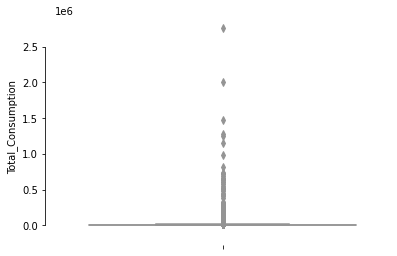

In [0]:
#df_log = np.log10(df_months.iloc[:,:-1])
#df_log['FLAG'] = df_months['FLAG']
sns.boxplot(y="Total_Consumption", hue="FLAG", data=df_months_total, palette="PRGn")
sns.despine(offset=10, trim=True)

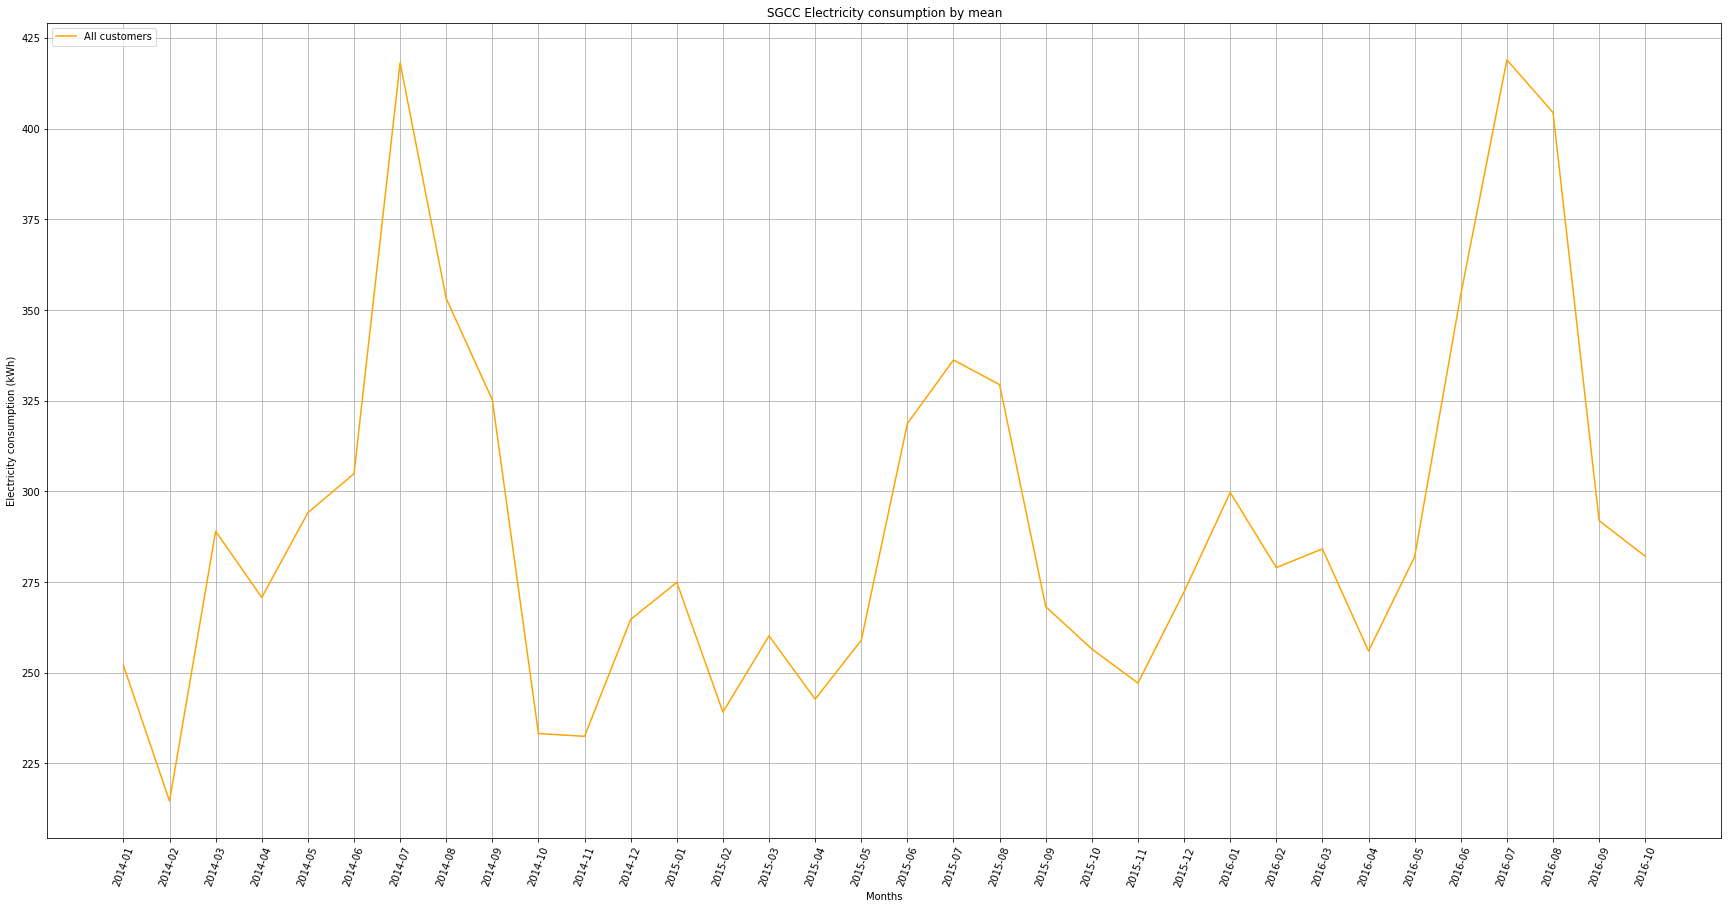

In [0]:
# Plotting the mean of electricity consumption for all customers by monthly
import numpy as np
import matplotlib.pyplot as plt

df_months_all = df_months.transpose()
df_months_all = df_months_all.iloc[:-1,].mean(axis=1)

fig, ax = plt.subplots(1,1, figsize=(30,15))
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Months')
plt.grid(True)
plt.title('SGCC Electricity consumption by mean')
ax = plt.plot(df_months_all, color='orange', linestyle='solid', label='All customers')
plt.legend(loc=2)

plt.show()

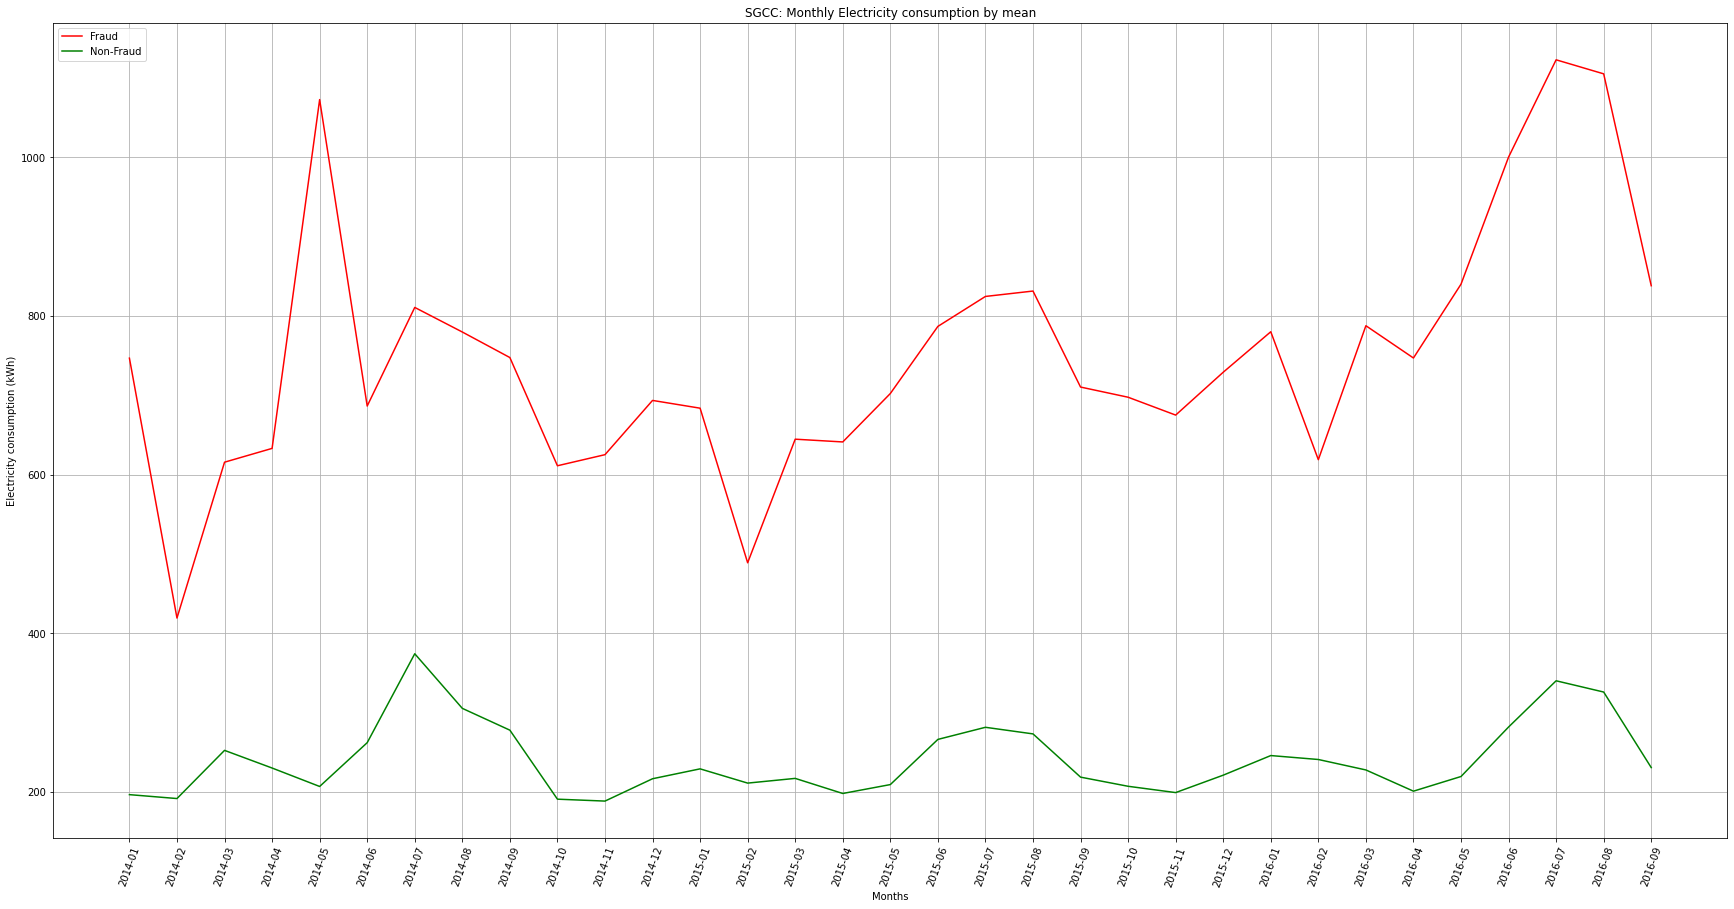

In [0]:
# Plotting the mean of electricity consumption for all customers
import numpy as np
import matplotlib.pyplot as plt

df1 = df_months[df_months.FLAG == 1]
df0 = df_months[df_months.FLAG == 0]

df1_months = df1.transpose()
df0_months = df0.transpose()

df1_months_mean = df1_months.iloc[:-2,].mean(axis=1)
df0_months_mean = df0_months.iloc[:-2,].mean(axis=1)

fig, ax = plt.subplots(1,1, figsize=(30,15))
ax1 = plt.plot(df1_months_mean, color='red', linestyle='solid', label='Fraud')
ax2 = plt.plot(df0_months_mean, color='green', linestyle='solid', label='Non-Fraud')
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Months')
plt.grid(True)
plt.title('SGCC: Monthly Electricity consumption by mean')
plt.legend(loc=2)

plt.show()

In [0]:
# # Plotting the max of electricity consumption for all customers
# import numpy as np
# import matplotlib.pyplot as plt

# df1 = df_months[df_months.FLAG == 1]
# df0 = df_months[df_months.FLAG == 0]

# df1_months = df1.transpose()
# df0_months = df0.transpose()

# df1_months_max = df1_months.iloc[:-2,].max(axis=1)
# df0_months_max = df0_months.iloc[:-2,].max(axis=1)

# fig, ax = plt.subplots(1,1, figsize=(16,9))
# ax1 = plt.plot(df1_months_max, color='red', linestyle='solid', label='Fraud')
# ax2 = plt.plot(df0_months_max, color='green', linestyle='solid', label='Non-Fraud')
# plt.ylabel('Electricity consumption (kWh)')
# plt.xticks(rotation=70)
# plt.xlabel('Months')
# plt.grid(True)
# plt.title('SGCC: Monthly Electricity consumption by max')
# plt.legend(loc=2)

# plt.show()

In [0]:
# df_months_pcorr = df_months.corr(method='pearson')
# df_months_pcorr

In [0]:
# import seaborn as sns

# fig, ax = plt.subplots(1,1, figsize=(30,9))
# sns.heatmap(df_months_pcorr, 
#             xticklabels=df_months_pcorr.columns,
#             yticklabels=df_months_pcorr.columns,
#             cmap='RdBu_r',
#             annot=True,
#             linewidth=0.5)

In [0]:
# df_months.to_csv('/content/drive/My Drive/data/CSV/sgcc-no-missing-values_df_months.csv', sep=',', index=True)

In [0]:
# Max and min values of total consumption
print(df_months_total["Total_Consumption"].max())
print(df_months_total["Total_Consumption"].min())

2765812.0
0.01


In [0]:
df_months_total[df_months_total["Total_Consumption"] == 2765812.0]

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
1964,0.0,11948.4,41155.6,36791.2,955189.6,26987.2,34412.8,31255.2,25770.4,18970.8,17576.0,22975.6,23902.0,20926.4,56585.6,56332.4,63485.2,74148.8,85180.0,87185.6,70481.2,67376.0,63126.0,77603.6,86416.8,78906.8,74432.0,65945.2,69150.8,81393.6,103694.4,98688.0,69122.4,68696.4,2446065.6,1492665.6,1592892.8,2765812.0,1


In [0]:
df_months_total[df_months_total["Total_Consumption"] == 0.01]

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
2637,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0
3538,0.00,0.0,0.00,0.0,0.01,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0
4863,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0
7138,0.00,0.0,0.00,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0
7947,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0
9253,0.01,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0
9308,0.00,0.0,0.00,0.0,0.01,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0
10023,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0
10084,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0
10225,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0


In [0]:
# Separate Fraud and Non-Fraud customers
df_flag1 = df_months_total[df_months_total.FLAG == 1]
df_flag0 = df_months_total[df_months_total.FLAG == 0]

In [0]:
df_flag1

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39,9807.98,6716.00,7916.10,12220.04,1
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15,4977.08,3878.64,8198.50,8527.11,1
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93,871.06,1341.78,936.36,1574.60,1
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43,852.26,1960.04,2813.24,2812.77,1
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15,30002.58,51267.22,46148.76,63709.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,165.06,234.82,298.40,247.58,227.78,216.52,245.92,529.13,763.80,229.79,57.60,95.80,93.69,101.27,97.48,83.07,90.72,84.00,94.83,97.50,75.04,94.96,102.40,348.22,347.59,324.41,150.80,68.68,74.03,70.98,108.46,117.08,87.37,81.80,6624.40,2726.36,2862.40,6106.58,1
2398,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67.24,23.77,22.11,21.91,24.90,23.90,31.39,19.06,33.56,35.36,112.87,33.71,95.86,14.02,1.32,0.66,0.64,2.35,3.08,0.38,1.14,0.00,832.14,306.32,569.23,1
2399,0.31,0.28,0.31,0.30,0.31,0.30,0.31,0.31,0.30,0.30,0.30,0.31,0.31,74.12,8.39,11.71,11.91,11.62,12.85,15.52,12.51,301.69,503.80,92.97,91.45,31.13,23.27,41.40,91.55,157.54,234.52,326.38,573.00,785.11,7.28,2114.80,4710.70,3416.39,1
2400,1488.25,1056.18,2514.85,2792.05,3162.46,4040.66,4859.80,3401.87,3391.78,2313.90,372.61,174.15,176.35,83.94,183.54,187.60,195.62,1231.75,2613.70,2402.54,3717.92,6216.73,6559.75,7212.42,6067.05,4545.67,7377.99,7221.62,6947.07,5623.26,4856.21,4549.27,4424.72,10002.36,59137.12,61563.72,123230.44,121965.64,1


In [0]:
df_flag0['Total_Consumption'].values

array([15398.16,  5014.55,  7707.45, ...,  5156.06,  5964.01,   200.99])

In [0]:
df_flag1['Total_Consumption'].values

array([ 12220.04,   8527.11,   1574.6 , ...,   3416.39, 121965.64,
        10287.59])

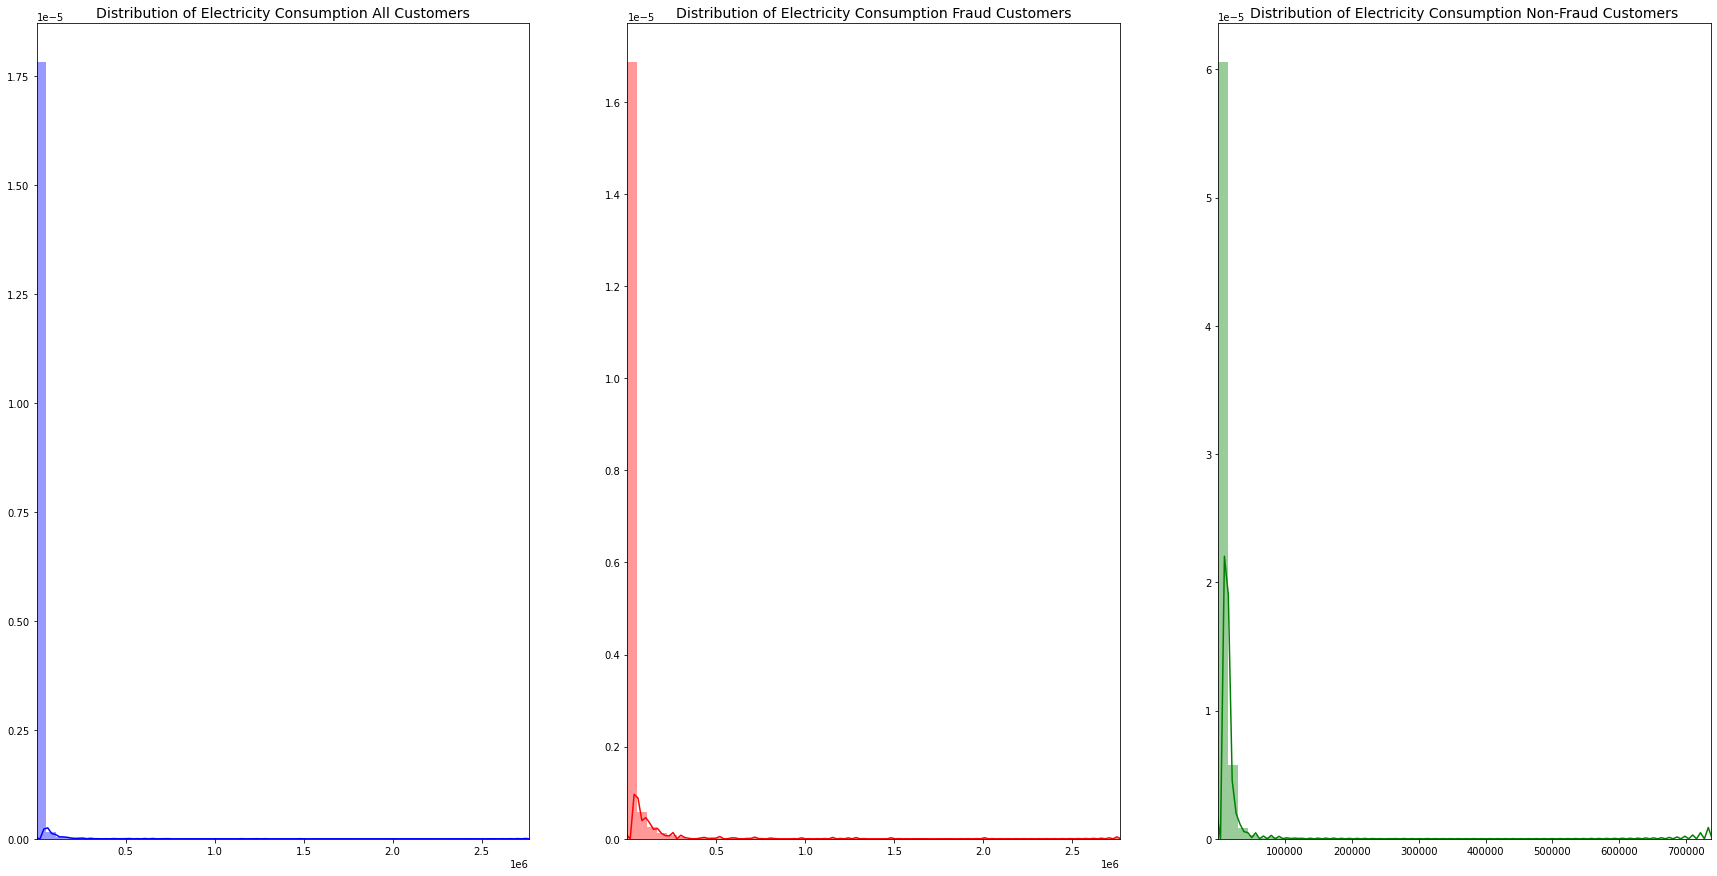

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(30,15))

Total_Consumption = df_months_total['Total_Consumption'].values
F0_Total_Consumption = df_flag0['Total_Consumption'].values
F1_Total_Consumption = df_flag1['Total_Consumption'].values

sns.distplot(Total_Consumption, ax=ax[0], color='b')
ax[0].set_title('Distribution of Electricity Consumption All Customers', fontsize=14)
ax[0].set_xlim([min(Total_Consumption), max(Total_Consumption)])

sns.distplot(F1_Total_Consumption, ax=ax[1], color='r')
ax[1].set_title('Distribution of Electricity Consumption Fraud Customers', fontsize=14)
ax[1].set_xlim([min(F1_Total_Consumption), max(F1_Total_Consumption)])

sns.distplot(F0_Total_Consumption, ax=ax[2], color='g')
ax[2].set_title('Distribution of Electricity Consumption Non-Fraud Customers', fontsize=14)
ax[2].set_xlim([min(F0_Total_Consumption), max(F0_Total_Consumption)])

plt.show()

In [0]:
round(df_months.iloc[:,:-2].mean(axis=1).sort_values(ascending=False), 2)

1964     81730.78
1734     59925.82
2356     42748.45
1263     38011.32
966      34713.64
           ...   
10190        0.00
4307         0.00
557          0.00
14822        0.00
1915         0.00
Length: 23849, dtype: float64

In [0]:
df_months.iloc[:,:-1]

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0.08,0.03,0.06,0.07,0.04,0.35,0.00,0.03,0.01,0.02,0.01,0.01,1.03,8.14,1.40,81.97,50.34,59.66,39.80,28.67,57.96,91.12,110.98,154.18,123.01,74.00,70.03,64.84,23.94,0.01,35.49,38.33,38.34,39.10
23845,0.00,1195.38,4117.42,3984.60,3867.40,4210.82,4916.98,3954.23,3599.20,2535.49,2388.86,2530.23,2365.60,1373.71,2202.43,2471.46,3180.61,3852.82,3933.40,3882.46,3123.51,2969.28,2565.86,2301.39,2545.16,1846.27,2279.19,2230.38,3013.14,3791.73,10479.74,7353.82,5403.92,5551.93
23846,65.26,77.31,54.06,57.53,56.34,32.61,10.88,5.43,6.80,5.70,3.29,298.11,688.82,339.79,496.14,98.69,154.87,77.88,178.94,171.10,121.43,94.73,60.32,75.60,68.25,229.74,167.56,270.08,215.08,172.67,211.66,218.06,179.35,191.98
23847,0.00,41.67,135.88,113.09,128.18,198.26,391.73,363.76,356.36,112.07,105.32,124.11,131.88,128.36,123.99,114.72,121.73,249.83,284.06,148.18,143.40,148.18,143.40,148.18,142.68,159.18,144.42,113.31,165.51,280.41,315.84,286.20,218.51,181.61


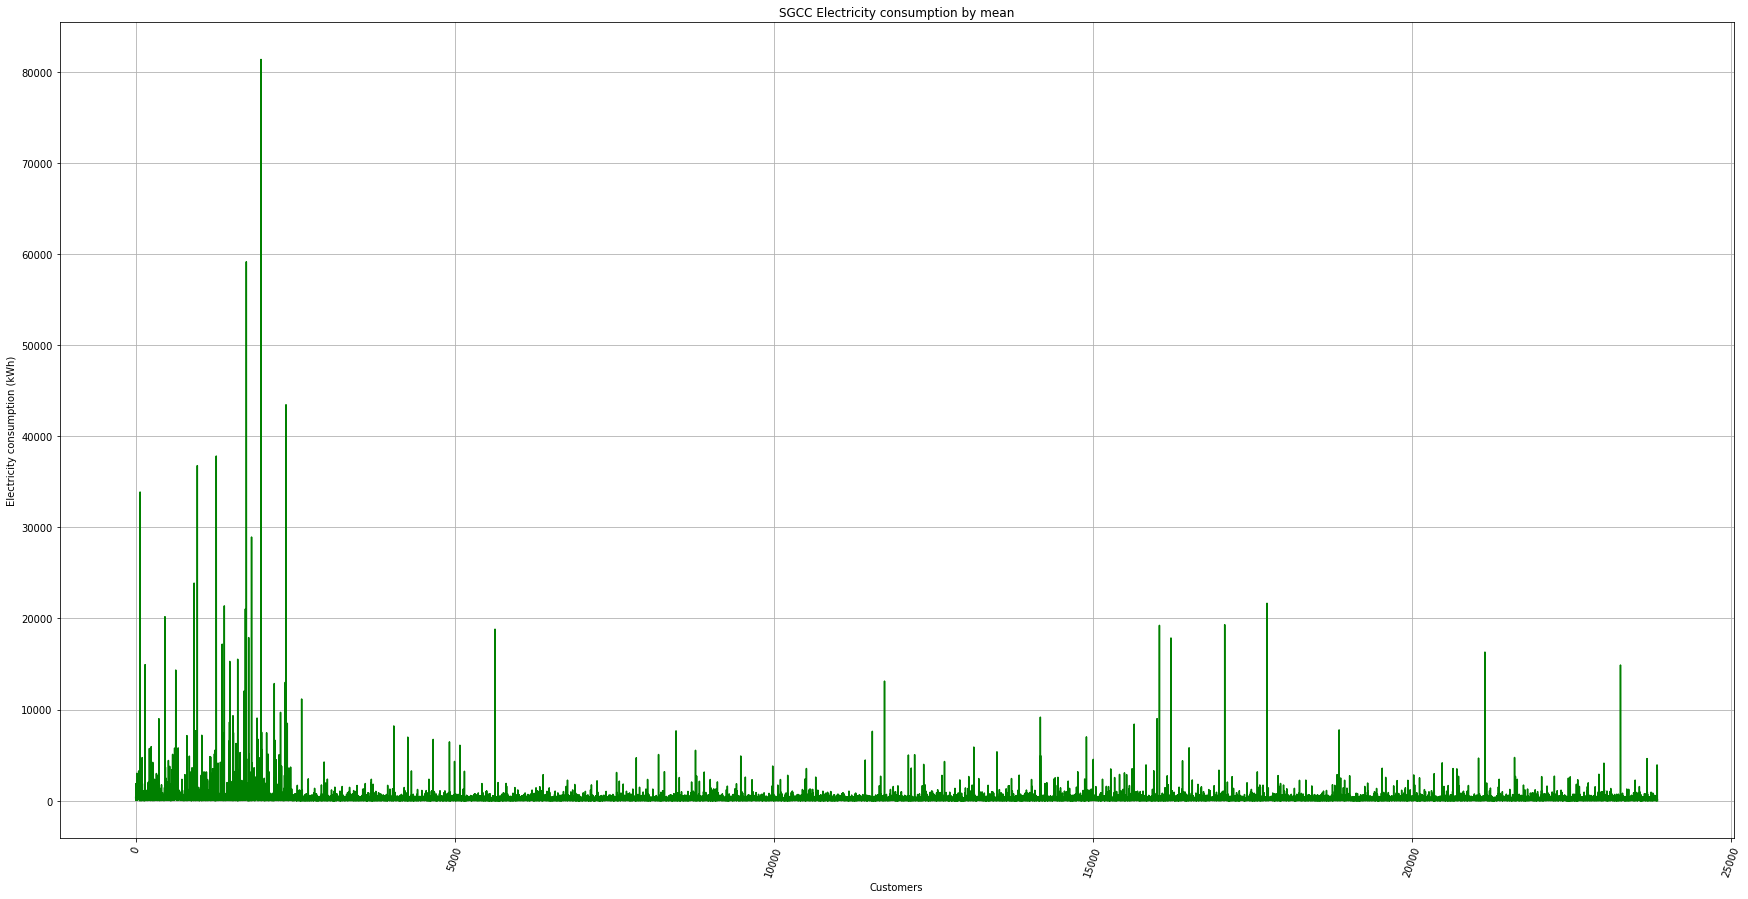

In [0]:
# Plotting the mean of electricity consumption for all customers
import numpy as np
import matplotlib.pyplot as plt

df_months_mean = df_months.iloc[:,:-1].mean(axis=1)

fig, ax = plt.subplots(1,1, figsize=(30,15))
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Customers')
plt.grid()
plt.title('SGCC Electricity consumption by mean')
plt.plot(df_months_mean, color='green', linestyle='solid')

In [0]:
# Max and min mean values
print(df_months_mean.max())
print(df_months_mean.min())

81347.41176470589
0.00029411764705882356


In [0]:
df_flag1

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
0,257.30,232.40,199.79,220.14,218.60,279.80,746.37,628.67,695.42,687.62,497.61,240.27,285.20,257.60,285.20,276.00,285.20,276.00,285.20,285.20,276.00,285.20,276.00,285.20,263.31,349.56,272.32,251.88,227.60,459.22,881.06,593.22,381.49,278.39,9807.98,6716.00,7916.10,12220.04,1
1,157.16,200.79,229.87,167.98,162.08,161.62,308.44,331.98,281.47,206.07,135.62,145.46,180.30,175.92,146.78,161.40,114.44,190.35,220.39,228.04,153.70,120.62,109.99,137.39,171.64,196.35,200.74,385.09,380.01,565.80,832.17,665.14,362.16,340.15,4977.08,3878.64,8198.50,8527.11,1
2,26.27,27.30,9.16,112.05,132.61,9.57,6.49,5.15,1.08,0.50,19.17,86.18,92.66,88.61,6.67,19.66,60.54,84.91,138.55,75.91,29.22,58.79,9.61,5.76,0.80,67.99,24.36,26.71,15.91,53.68,96.94,65.42,57.44,58.93,871.06,1341.78,936.36,1574.60,1
3,78.85,73.79,25.03,21.09,25.33,25.33,25.37,31.80,39.39,25.50,24.18,30.47,57.27,57.37,109.79,52.82,26.20,20.33,71.35,129.30,93.45,141.28,89.74,131.12,138.46,283.02,144.80,136.27,144.31,118.43,117.58,107.27,93.05,123.43,852.26,1960.04,2813.24,2812.77,1
4,233.60,220.18,714.43,1182.97,1274.94,1567.05,2250.72,2276.94,1943.68,1099.14,1080.41,1157.23,1174.79,2050.44,2270.13,2196.90,2270.13,2196.90,2270.13,2270.13,2196.90,2270.13,2196.90,2270.13,1949.50,1373.34,2140.52,1829.69,2118.86,2954.35,3588.56,3385.07,2072.34,1662.15,30002.58,51267.22,46148.76,63709.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,165.06,234.82,298.40,247.58,227.78,216.52,245.92,529.13,763.80,229.79,57.60,95.80,93.69,101.27,97.48,83.07,90.72,84.00,94.83,97.50,75.04,94.96,102.40,348.22,347.59,324.41,150.80,68.68,74.03,70.98,108.46,117.08,87.37,81.80,6624.40,2726.36,2862.40,6106.58,1
2398,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67.24,23.77,22.11,21.91,24.90,23.90,31.39,19.06,33.56,35.36,112.87,33.71,95.86,14.02,1.32,0.66,0.64,2.35,3.08,0.38,1.14,0.00,832.14,306.32,569.23,1
2399,0.31,0.28,0.31,0.30,0.31,0.30,0.31,0.31,0.30,0.30,0.30,0.31,0.31,74.12,8.39,11.71,11.91,11.62,12.85,15.52,12.51,301.69,503.80,92.97,91.45,31.13,23.27,41.40,91.55,157.54,234.52,326.38,573.00,785.11,7.28,2114.80,4710.70,3416.39,1
2400,1488.25,1056.18,2514.85,2792.05,3162.46,4040.66,4859.80,3401.87,3391.78,2313.90,372.61,174.15,176.35,83.94,183.54,187.60,195.62,1231.75,2613.70,2402.54,3717.92,6216.73,6559.75,7212.42,6067.05,4545.67,7377.99,7221.62,6947.07,5623.26,4856.21,4549.27,4424.72,10002.36,59137.12,61563.72,123230.44,121965.64,1


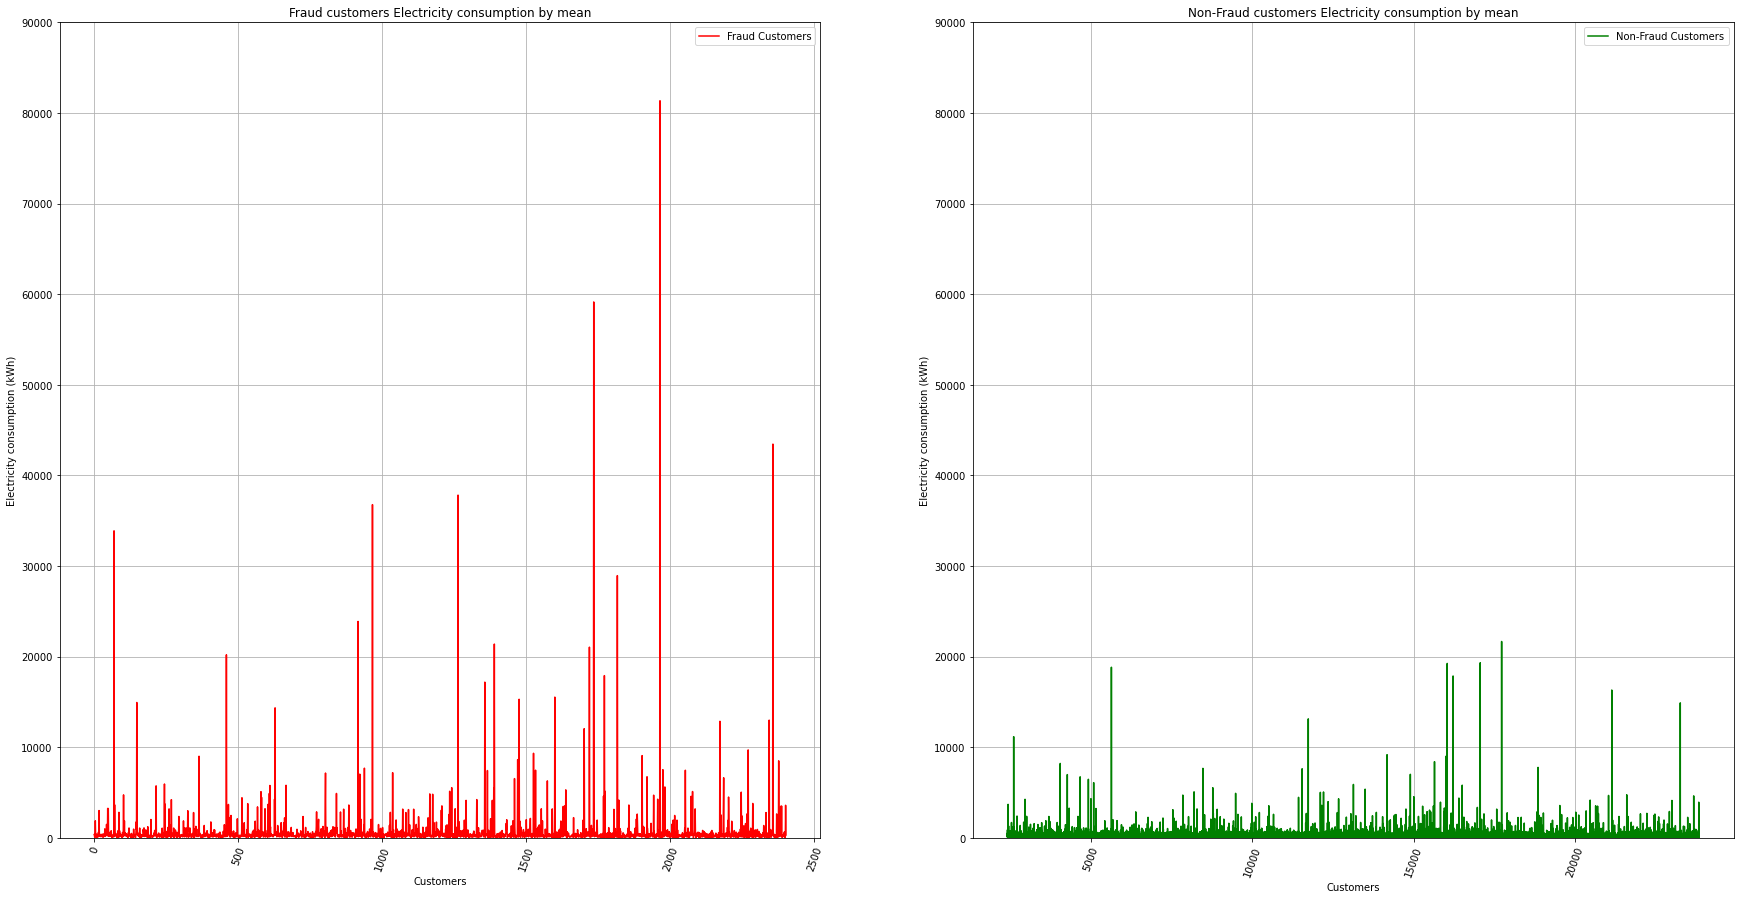

In [0]:
# Plotting Fraud and Non-Fraud customers by mean consumption
df_flag1_mean = df_flag1.iloc[:,:-5].mean(axis=1)
df_flag0_mean = df_flag0.iloc[:,:-5].mean(axis=1)

fig, ax = plt.subplots(1,1, figsize=(30,15))
plt.subplot(1, 2, 1)
plt.plot(df_flag1_mean, '-r', label='Fraud Customers')
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Customers')
plt.legend()
plt.grid()
plt.ylim(0, 90000)
plt.title('Fraud customers Electricity consumption by mean')

plt.subplot(1, 2, 2)
plt.plot(df_flag0_mean, '-g', label='Non-Fraud Customers')
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Customers')
plt.legend()
plt.grid()
plt.ylim(0, 90000)
plt.title('Non-Fraud customers Electricity consumption by mean')

plt.show()

      2014-01  2014-02  2014-03  2014-04  ...  2016-07  2016-08  2016-09  2016-10
1269   129.10   151.13   101.17    73.15  ...   602.48   459.99   270.26   260.91
1005    23.02    12.50    43.30    70.37  ...   124.26    90.60    90.99   119.87

[2 rows x 34 columns]
       2014-01  2014-02  2014-03  2014-04  ...  2016-07  2016-08  2016-09  2016-10
12065    92.38    83.44    92.38     89.4  ...   159.80   163.88   142.18   178.76
4036    601.53   573.57   425.59    288.3  ...    33.03    41.89   687.16   492.07

[2 rows x 34 columns]


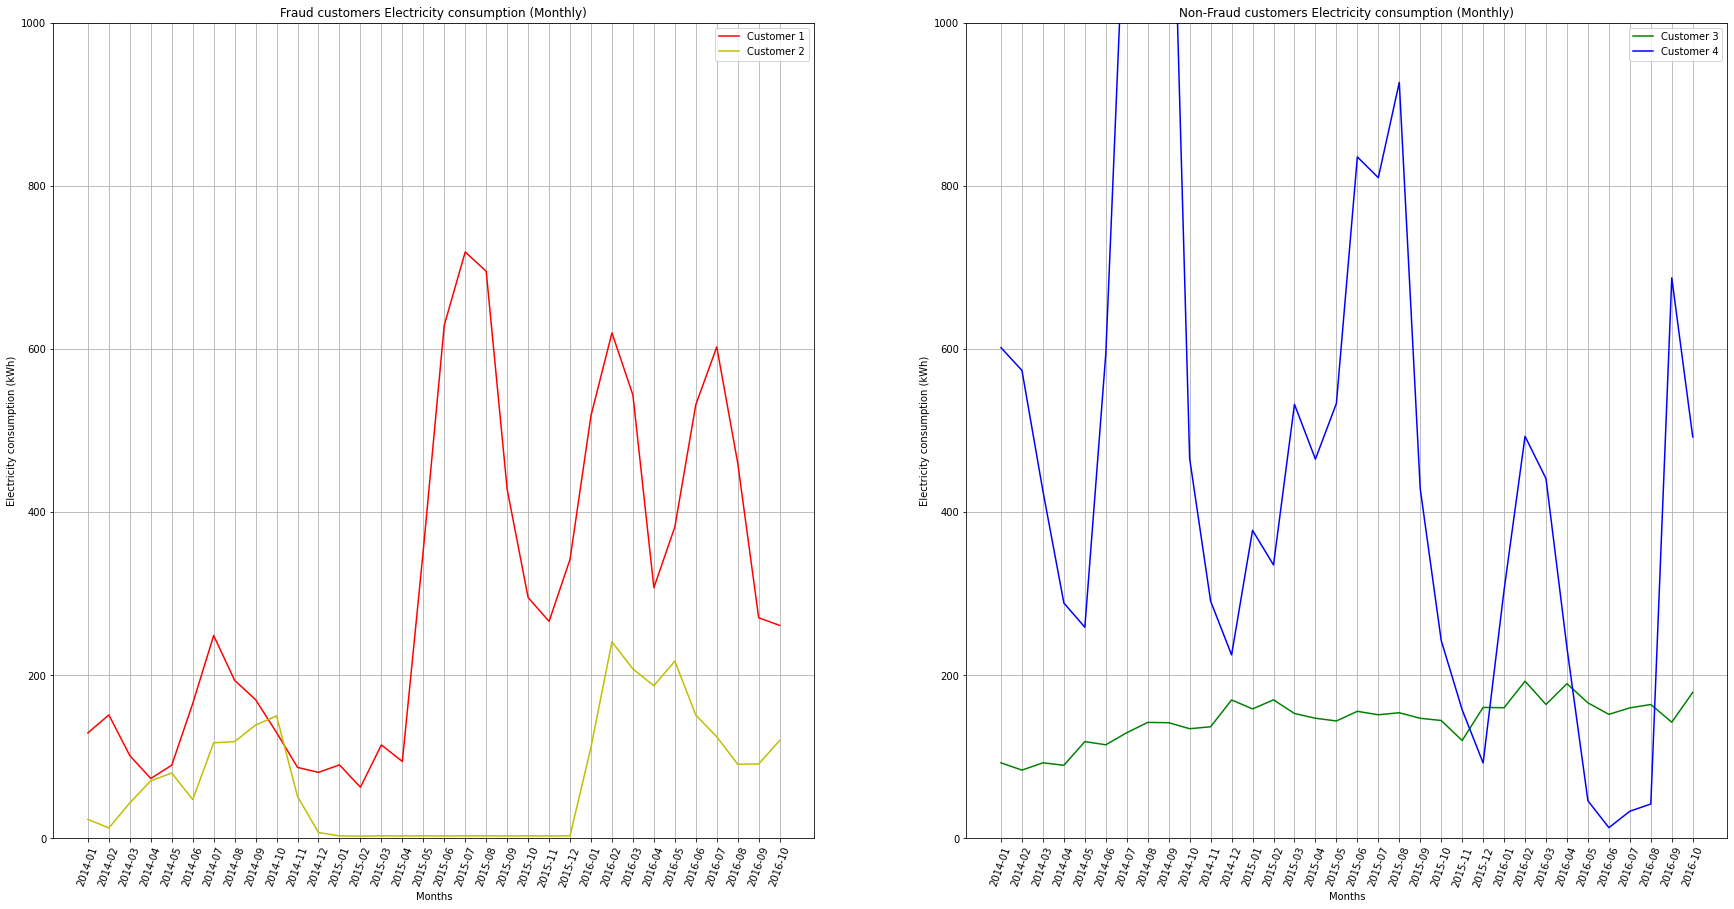

In [0]:
# Plotting random Fraud vs Non-Fraud customers monthly
#F1_customer = df_flag1.sample(n=2).filter(regex='2015', axis=1)
F1_customer = df_flag1.iloc[:,:-5].sample(n=2)
print(F1_customer)
F1_customer = F1_customer.transpose()

#F0_customer = df_flag0.sample(n=2).filter(regex='2015', axis=1)
F0_customer = df_flag0.iloc[:,:-5].sample(n=2)
print(F0_customer)
F0_customer = F0_customer.transpose()

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(30,15))

plt.subplot(1, 2, 1)
plt.plot(F1_customer.iloc[:,0:1], '-r', label='Customer 1')
plt.plot(F1_customer.iloc[:,1:2], '-y', label='Customer 2')
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Months')
plt.legend()
plt.grid()
plt.ylim(0, 1000)
plt.grid(True)
plt.title('Fraud customers Electricity consumption (Monthly)')

plt.subplot(1, 2, 2)
plt.plot(F0_customer.iloc[:,0:1], '-g', label='Customer 3')
plt.plot(F0_customer.iloc[:,1:2], '-b', label='Customer 4')
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Months')
plt.legend()
plt.grid()
plt.ylim(0, 1000)
plt.grid(True)
plt.title('Non-Fraud customers Electricity consumption (Monthly)')

plt.show()

      2014-01  2014-02  2014-03  2014-04  ...  2016-07  2016-08  2016-09  2016-10
739    288.82   185.74   448.68    360.3  ...   428.92   795.86   460.22   541.69
1953    16.46     9.86     6.27      0.0  ...  1604.28   935.51   721.71   615.58

[2 rows x 34 columns]
       2014-01  2014-02  2014-03  2014-04  ...  2016-07  2016-08  2016-09  2016-10
3374    498.07   450.25   465.20   402.78  ...   896.45   844.58   648.99   529.23
15718   111.56    77.81   114.76   105.55  ...   202.70   175.55    72.25   153.02

[2 rows x 34 columns]


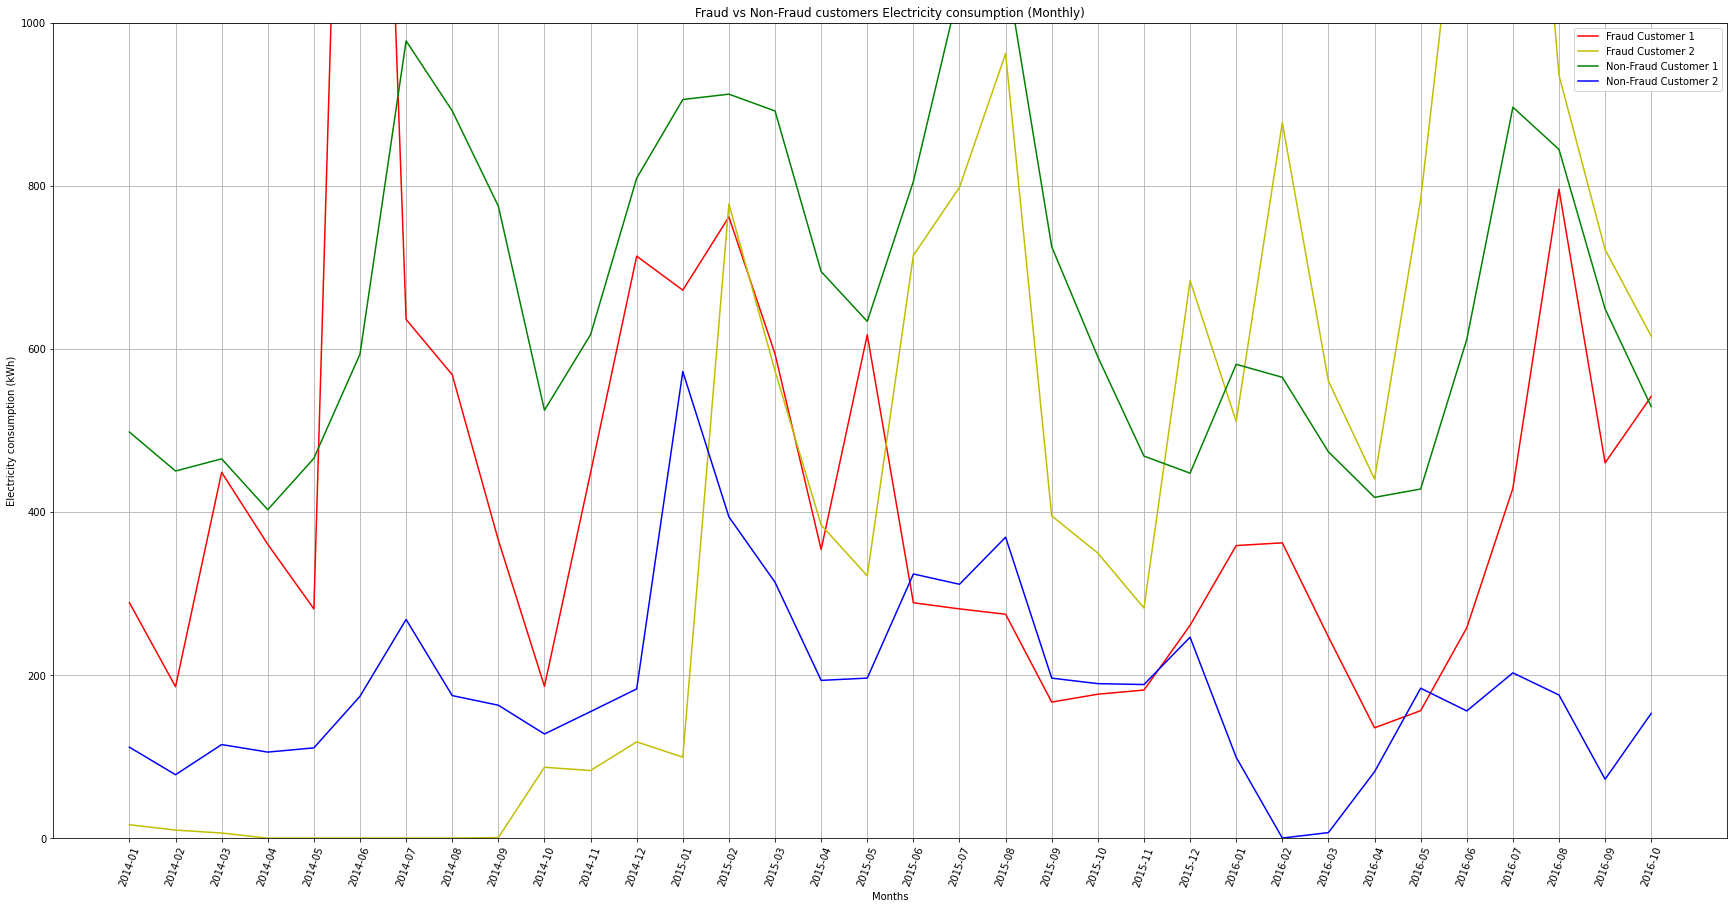

In [0]:
# Plotting random Fraud vs Non-Fraud customers monthly
#F1_customer = df_flag1.sample(n=2).filter(regex='2015', axis=1)
F1_customer = df_flag1.iloc[:,:-5].sample(n=2)
print(F1_customer)
F1_customer = F1_customer.transpose()

#F0_customer = df_flag0.sample(n=2).filter(regex='2015', axis=1)
F0_customer = df_flag0.iloc[:,:-5].sample(n=2)
print(F0_customer)
F0_customer = F0_customer.transpose()

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(30,15))

plt.subplot(1, 1, 1)
plt.plot(F1_customer.iloc[:,0:1], '-r', label='Fraud Customer 1')
plt.plot(F1_customer.iloc[:,1:2], '-y', label='Fraud Customer 2')
plt.plot(F0_customer.iloc[:,0:1], '-g', label='Non-Fraud Customer 1')
plt.plot(F0_customer.iloc[:,1:2], '-b', label='Non-Fraud Customer 2')
plt.ylabel('Electricity consumption (kWh)')
plt.xticks(rotation=70)
plt.xlabel('Months')
plt.legend()
plt.grid()
plt.ylim(0, 1000)
plt.grid(True)
plt.title('Fraud vs Non-Fraud customers Electricity consumption (Monthly)')

plt.show()

      2014-01  2014-02  2014-03  2014-04  ...  2016-07  2016-08  2016-09  2016-10
2013    11.75     10.6   182.13   359.15  ...   141.05   124.22   142.28   235.89

[1 rows x 34 columns]
       2014-01  2014-02  2014-03  2014-04  ...  2016-07  2016-08  2016-09  2016-10
14938  1286.42  1165.32  1273.94  1339.47  ...  1249.67  1284.41  1127.22   781.15

[1 rows x 34 columns]


Text(0, 0.5, 'Density')

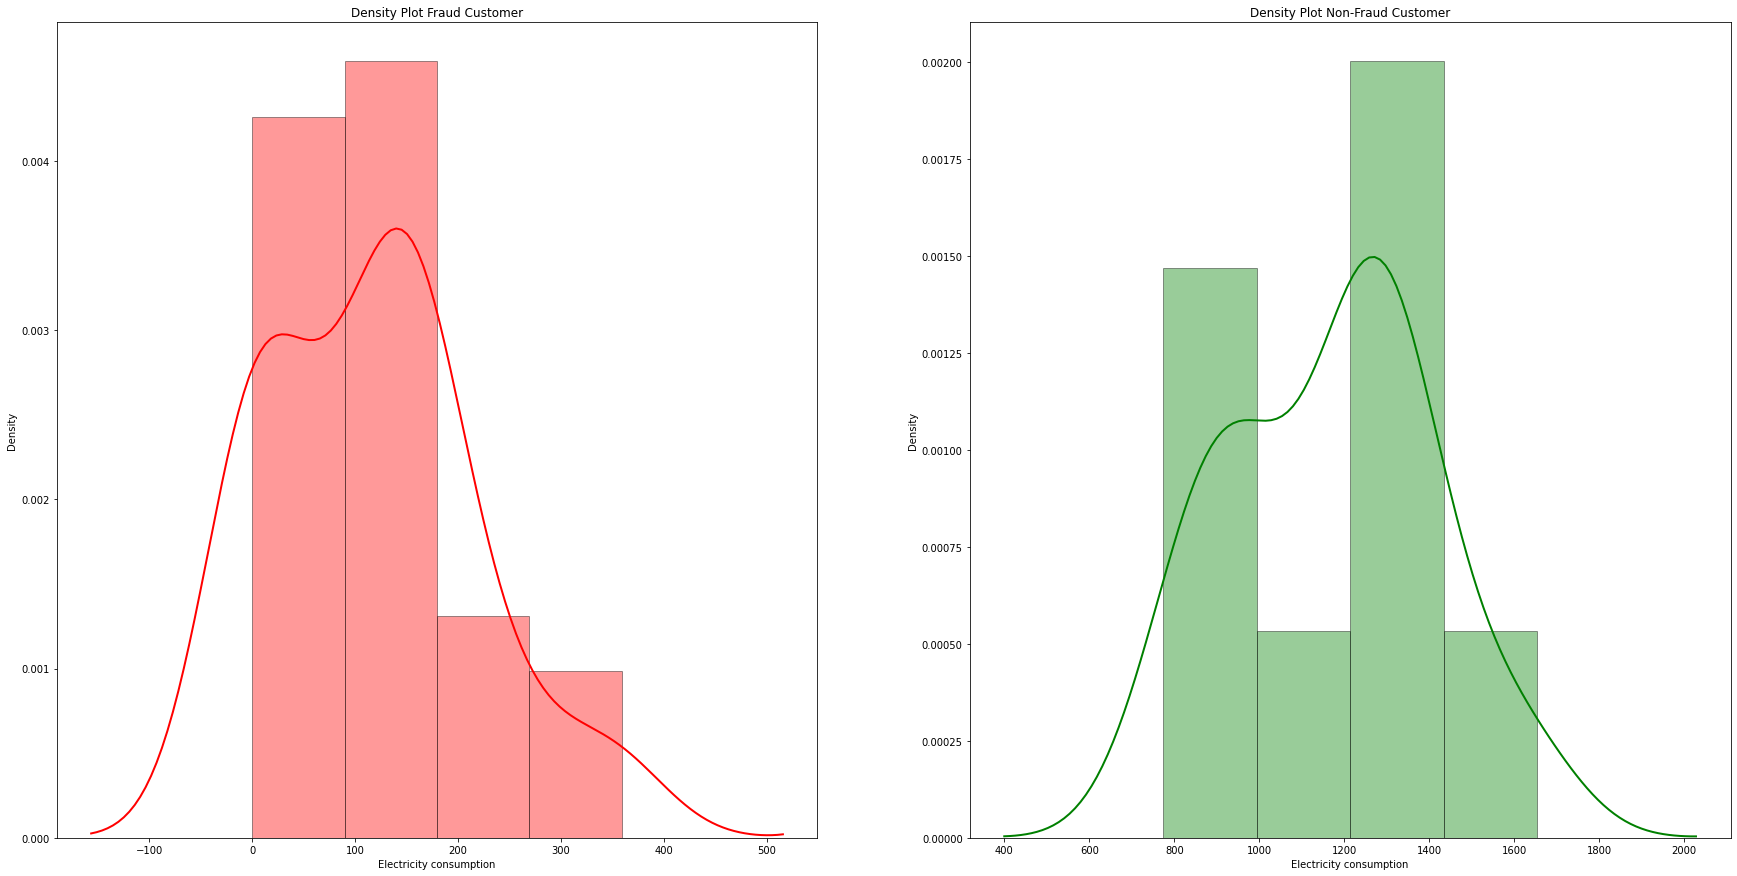

In [0]:
# The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).
# The histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.
# The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.
import seaborn as sns
F1_customer = df_flag1.iloc[:,:-5].sample(n=1)
print(F1_customer)
F1_customer = F1_customer.transpose()

F0_customer = df_flag0.iloc[:,:-5].sample(n=1)
print(F0_customer)
F0_customer = F0_customer.transpose()

fig, ax = plt.subplots(1,1, figsize=(30,15))

plt.subplot(1, 2, 1)
sns.distplot(F1_customer, hist=True, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Density Plot Fraud Customer')
plt.xlabel('Electricity consumption')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.distplot(F0_customer, hist=True, kde=True, 
             color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Density Plot Non-Fraud Customer')
plt.xlabel('Electricity consumption')
plt.ylabel('Density')

In [0]:
df_flag1.describe()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
count,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2.402000e+03,2.402000e+03,2.402000e+03,2.402000e+03,2402.0
mean,746.859428,419.249555,615.719571,633.113056,1072.812361,686.502124,810.820412,779.827698,747.630450,611.216961,625.193568,693.586191,683.801669,488.927569,644.721986,641.242057,702.285512,786.899367,824.663780,831.458643,710.436378,697.612052,675.099492,729.127527,780.153743,618.894172,787.750766,747.057635,840.120408,1000.327827,1122.960087,1105.268555,838.200616,852.013414,1.688506e+04,1.683255e+04,1.738549e+04,2.555155e+04,1.0
std,10978.129245,1738.907755,3348.448876,3945.942303,19910.299942,3658.290930,4025.728125,3825.147765,3966.814225,3808.967510,3725.500798,4054.215160,3398.455356,1668.534530,2807.884178,2797.685008,2884.942114,2900.655419,3151.953849,3218.142836,2841.561153,2731.145370,2575.297508,2780.725119,3073.981551,2358.477471,3419.023830,3461.119106,3812.392972,3983.021343,4051.303365,4175.671087,3515.415645,3831.122359,9.523531e+04,6.246529e+04,6.771576e+04,1.034368e+05,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e-01,1.0
25%,49.930000,52.252500,60.832500,56.910000,61.137500,68.282500,85.680000,85.280000,81.825000,67.192500,68.835000,79.407500,85.005000,89.030000,88.380000,81.245000,89.192500,103.850000,109.277500,110.920000,93.487500,98.057500,94.167500,104.915000,123.310000,130.455000,117.840000,113.985000,120.042500,140.392500,161.162500,157.200000,129.412500,134.050000,2.264765e+03,2.848685e+03,3.162335e+03,4.794615e+03,1.0
50%,159.480000,151.895000,168.205000,144.750000,152.320000,173.470000,241.240000,241.440000,222.585000,161.910000,169.865000,209.800000,214.295000,213.045000,216.015000,199.740000,221.360000,266.110000,279.425000,279.995000,234.630000,231.025000,230.500000,267.145000,300.280000,311.925000,284.010000,252.730000,274.755000,335.265000,412.690000,404.780000,291.725000,278.185000,4.990120e+03,6.076950e+03,6.584690e+03,9.234295e+03,1.0
75%,346.220000,318.627500,372.197500,325.060000,351.497500,404.460000,563.822500,569.060000,487.762500,354.687500,364.707500,439.557500,469.940000,419.745000,440.985000,415.405000,443.842500,564.550000,597.097500,590.685000,481.695000,474.132500,461.957500,515.215000,569.545000,550.337500,541.575000,468.047500,517.595000,712.695000,897.930000,830.660000,563.212500,534.625000,9.824260e+03,1.185630e+04,1.219785e+04,1.692470e+04,1.0
max,515000.160000,39125.000000,105948.000000,113283.530000,955189.600000,125124.000000,149118.000000,143688.000000,150960.000000,144180.000000,136398.000000,152928.000000,116022.000000,49268.550000,56585.600000,56332.400000,63485.200000,74148.800000,85180.000000,87185.600000,70481.200000,67376.000000,63126.000000,77603.600000,86416.800000,78906.800000,99730.000000,101175.000000,112733.000000,107811.000000,103694.400000,102599.000000,100346.000000,104707.000000,2.868372e+06,1.492666e+06,1.761916e+06,2.765812e+06,1.0


In [0]:
df_flag0.describe()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,Total_2014,Total_2015,Total_2016,Total_Consumption,FLAG
count,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,21447.000000,2.144700e+04,21447.000000,21447.000000,21447.000000,21447.0
mean,196.635612,191.715845,252.442815,230.186785,206.943276,262.143808,374.234846,305.408413,277.910870,190.925509,188.515044,216.679189,229.142903,211.185782,217.121541,198.098432,209.319325,266.266372,281.531557,273.214013,218.706433,207.171717,199.230297,221.181481,245.903414,240.939702,227.762447,201.009886,219.495889,281.879482,340.152154,325.977928,230.760801,218.302490,5.787484e+03,5464.339706,5064.368387,8158.096058,0.0
std,382.414966,383.895799,782.334658,951.594215,505.822173,4494.493091,5820.057934,640.598943,644.322947,509.737679,415.725793,444.768602,524.263412,399.812415,419.181470,422.502721,436.406532,550.648279,596.500389,573.747163,467.647436,438.097849,410.859497,441.672709,497.888866,468.189613,456.118713,392.676269,476.104579,680.419401,707.656086,668.850062,495.038803,462.890206,1.826066e+04,10755.513402,9931.514309,16859.981661,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.010000,0.0
25%,24.800000,34.160000,38.170000,36.205000,37.275000,41.020000,46.820000,47.615000,46.375000,39.945000,38.650000,42.365000,44.730000,46.915000,46.790000,42.190000,43.120000,46.650000,47.335000,47.430000,42.300000,41.920000,39.300000,42.255000,49.095000,53.165000,45.065000,42.315000,45.210000,49.615000,53.450000,53.640000,43.800000,44.365000,1.337440e+03,1392.220000,1272.170000,2401.065000,0.0
50%,125.540000,123.480000,144.800000,130.630000,136.950000,147.570000,183.720000,182.290000,165.550000,129.530000,130.180000,150.410000,155.630000,154.470000,155.410000,139.270000,145.490000,170.340000,177.010000,172.110000,144.900000,141.180000,136.070000,153.060000,172.050000,177.790000,162.250000,144.590000,150.600000,178.170000,206.680000,198.200000,150.010000,149.720000,3.825500e+03,3873.620000,3603.100000,5808.330000,0.0
75%,260.605000,246.645000,277.115000,241.045000,248.285000,276.370000,406.570000,388.980000,339.425000,228.030000,232.560000,277.975000,292.715000,278.195000,284.890000,248.825000,259.800000,333.460000,352.605000,341.605000,265.500000,253.100000,248.035000,285.055000,320.645000,321.530000,297.945000,257.185000,267.975000,347.285000,436.125000,407.965000,275.350000,264.155000,6.924640e+03,6848.870000,6330.070000,9956.180000,0.0
max,19958.780000,19286.800000,53578.410000,40568.910000,31419.600000,653581.590000,640000.000000,35461.400000,32929.400000,35883.600000,18246.000000,18767.700000,27455.240000,18290.400000,19741.200000,19764.120000,19678.800000,26820.300000,29793.600000,26872.200000,21183.300000,19678.800000,19044.000000,19678.800000,24328.500000,24519.900000,21860.100000,19427.100000,24365.700000,49872.370000,42998.700000,28986.600000,21053.100000,19481.100000,1.308875e+06,511555.200000,513514.800000,736653.300000,0.0


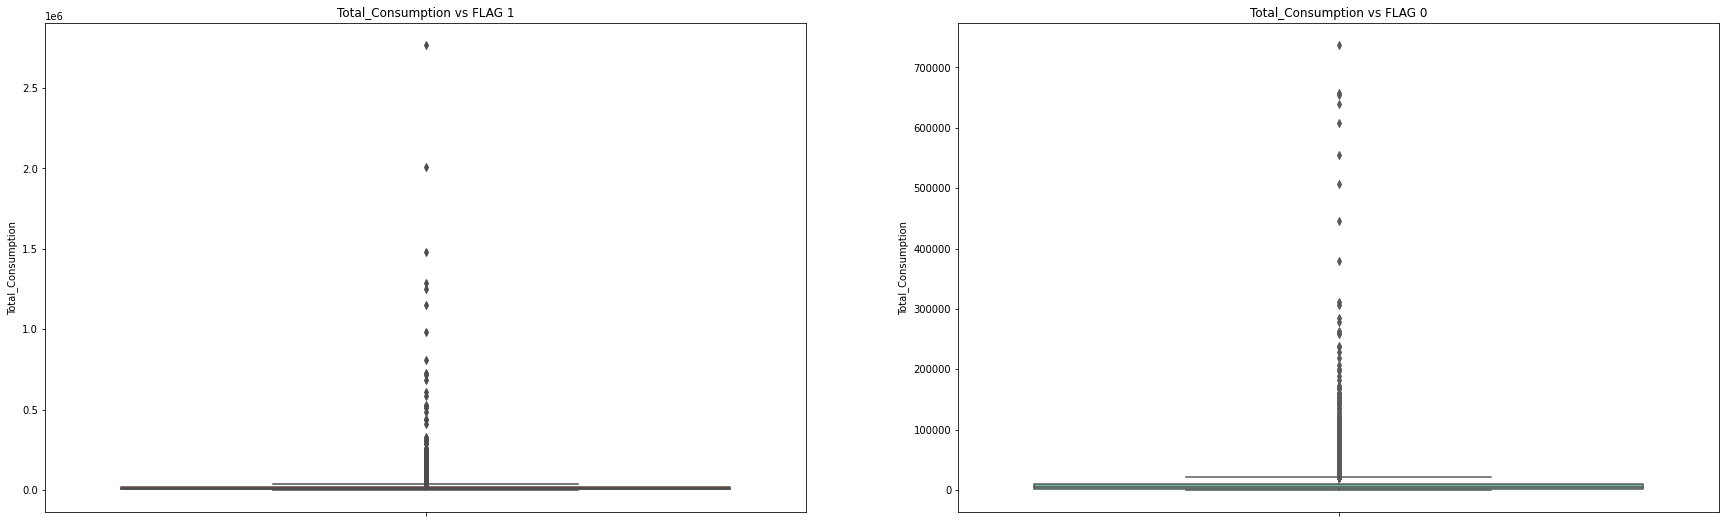

In [0]:
f, axes = plt.subplots(ncols=2, figsize=(30,9))

#sns.boxplot(x="FLAG", y="Total_Consumption", data=df_flag1, palette='Accent', ax=axes[0])
#axes[0].set_title('Total_Consumption vs FLAG 1')

#sns.boxplot(x="FLAG", y="Total_Consumption", data=df_flag0, palette='Accent', ax=axes[1])
#axes[1].set_title('Total_Consumption vs FLAG 0')

sns.boxplot(y=df_flag1["Total_Consumption"], palette="Set1", ax=axes[0])
axes[0].set_title('Total_Consumption vs FLAG 1')
sns.boxplot(y=df_flag0["Total_Consumption"], palette="Set2", ax=axes[1])
axes[1].set_title('Total_Consumption vs FLAG 0')

sns.set_style("darkgrid") 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


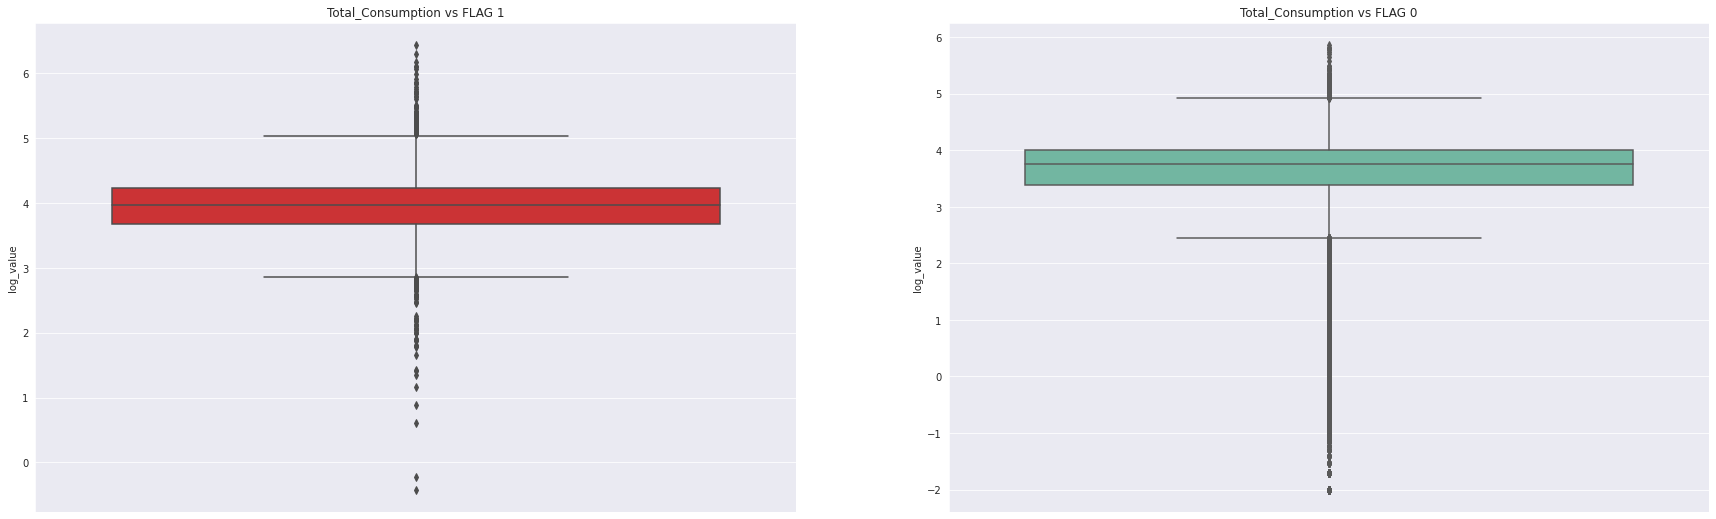

In [0]:
f, axes = plt.subplots(ncols=2, figsize=(30,9))

#sns.boxplot(x="FLAG", y="Total_Consumption", data=df_flag1, palette='Accent', ax=axes[0])
#axes[0].set_title('Total_Consumption vs FLAG 1')

#sns.boxplot(x="FLAG", y="Total_Consumption", data=df_flag0, palette='Accent', ax=axes[1])
#axes[1].set_title('Total_Consumption vs FLAG 0')

df1['log_value'] = np.log10(df_flag1['Total_Consumption'])
df0['log_value'] = np.log10(df_flag0['Total_Consumption'])

sns.boxplot(y=df1["log_value"], palette="Set1", ax=axes[0])
axes[0].set_title('Total_Consumption vs FLAG 1')
sns.boxplot(y=df0["log_value"], palette="Set2", ax=axes[1])
axes[1].set_title('Total_Consumption vs FLAG 0')

# sns.boxplot(y=df_flag1["Total_Consumption"], palette="Set1", ax=axes[0])
# axes[0].set_title('Total_Consumption vs FLAG 1')
# sns.boxplot(y=df_flag0["Total_Consumption"], palette="Set2", ax=axes[1])
# axes[1].set_title('Total_Consumption vs FLAG 0')

sns.set_style("darkgrid") 
plt.show()

  label  lower_whisker  lower_quartile   median  upper_quartile  upper_whisker
0  2014            0.0        2264.765  4990.12         9824.26       21123.72
1  2015            0.0        2264.765  4990.12         9824.26       21123.72
2  2016            0.0        2264.765  4990.12         9824.26       21123.72


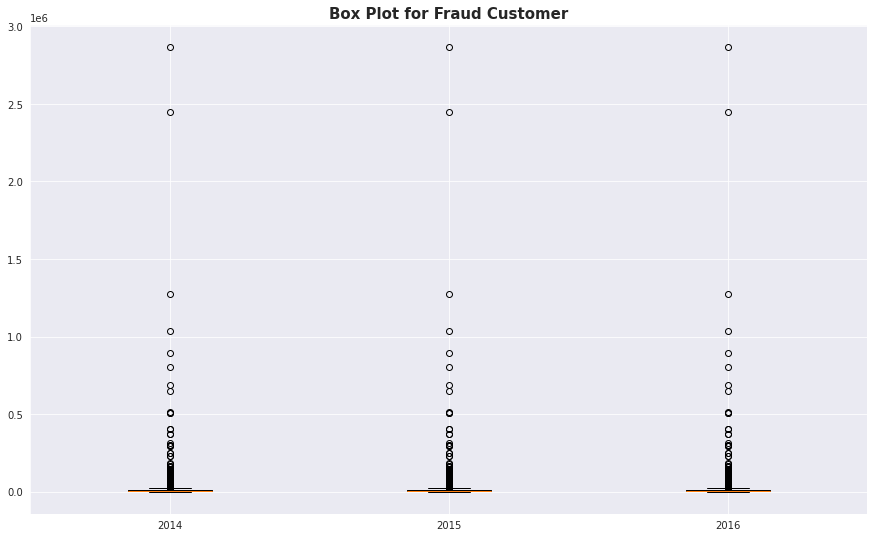

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

np.set_printoptions(threshold=sys.maxsize)

fig, ax = plt.subplots(1,1, figsize=(15,9))

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

T2014 = df_flag1["Total_2014"]
T2015 = df_flag1["Total_2015"]
T2016 = df_flag1["Total_2016"]

labels = ['2014', '2015', '2016']
bp = plt.boxplot([T2014, T2014, T2014], labels=labels)
print(get_box_plot_data(labels, bp))
plt.title('Box Plot for Fraud Customer', fontsize=15, fontweight='bold')
plt.show()

  label  lower_whisker  lower_quartile   median  upper_quartile  upper_whisker
0  2014            0.0         1337.44  3825.50         6924.64       15297.00
1  2015            0.0         1392.22  3873.62         6848.87       15031.96
2  2016            0.0         1272.17  3603.10         6330.07       13916.02


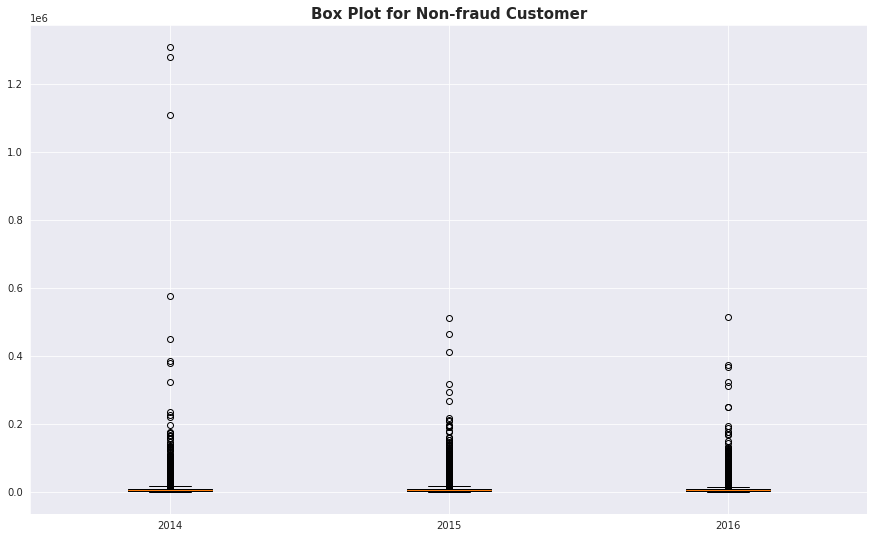

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

np.set_printoptions(threshold=sys.maxsize)

fig, ax = plt.subplots(1,1, figsize=(15,9))

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

T2014 = df_flag0["Total_2014"]
T2015 = df_flag0["Total_2015"]
T2016 = df_flag0["Total_2016"]

labels = ['2014', '2015', '2016']
bp = plt.boxplot([T2014, T2015, T2016], labels=labels)
print(get_box_plot_data(labels, bp))
plt.title('Box Plot for Non-fraud Customer', fontsize=15, fontweight='bold')
plt.show()

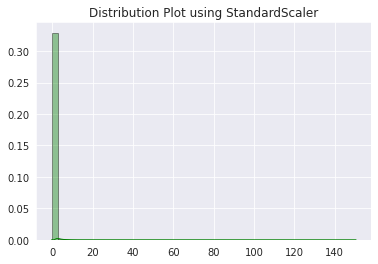

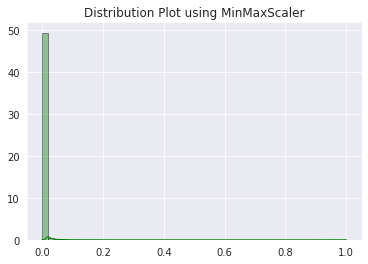

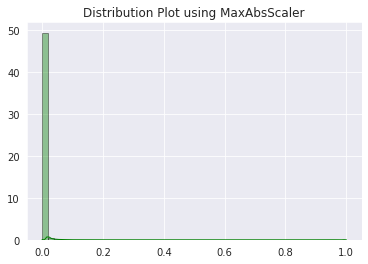

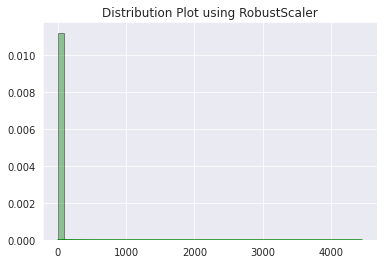

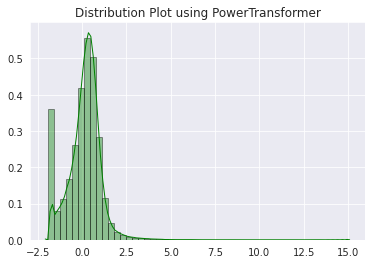

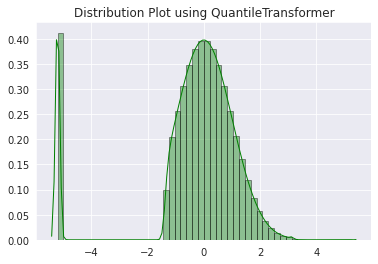

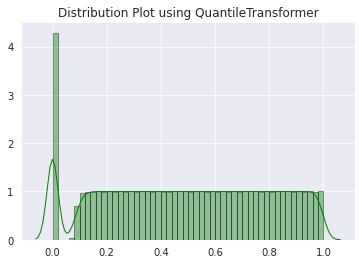

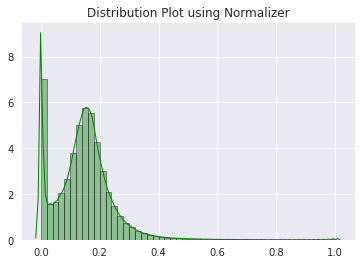

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

scaler_names = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler(quantile_range=(25, 75)), PowerTransformer(method='yeo-johnson'),
            QuantileTransformer(output_distribution='normal'), QuantileTransformer(output_distribution='uniform'), Normalizer()]

df_months_only = df_months.iloc[:,:-2]
#scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = MaxAbsScaler()
#scaler = RobustScaler(quantile_range=(25, 75))
#scaler = PowerTransformer(method='yeo-johnson')
##scaler = PowerTransformer(method='box-cox') # The Box-Cox transformation can only be applied to strictly positive data
#scaler = QuantileTransformer(output_distribution='normal')
#scaler = QuantileTransformer(output_distribution='uniform')
#scaler = Normalizer()

def scaled(scaler_name):
  scaler = scaler_name
  df_months_only_scaled = scaler.fit_transform(df_months_only)
  #fig, ax = plt.subplots(1, 1, figsize=(8, 5))
  plt.title('Distribution Plot using {}'.format(scaler_name.__class__.__name__))
  sns.distplot(df_months_only_scaled, hist=True, kde=True, 
             color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
    
  plt.show()
  
for scaler in scaler_names:
  scaled(scaler)

In [0]:
myList = range(1, 100)
myList.count(5)

1